# Generative modelling in deep learning

*This notebook consists of common introductory questions, followed by 4 different generative models, and a common conclusive question. **Choose & implement 2 among the 4 models**, not all of them! If you train more models, write down below the 2 ones you want to be graded on. Do not forget the last common question.*

Generative modelling in machine learning can aim at achieving different goals.

The first, obvious one is that a generative model can be used to generate more data, to be used afterwards by another algorithm. While a generative model cannot create more information to solve the issue of having too small datasets, it could be used to solve anonymity questions. Typically, sharing a generative model trained on private data could allow the exploitation of the statistical property of this data without sharing the data itself (which can be protected by privacy matters for example).

Another goal is to use generative modelling to better understand the data at hand. This is based on the hypothesis that a model that successfully learned to generate (and generalize) a dataset should have internally learned some efficient and compressed representation of the information contained in the data. In this case, analysing a posteriori the learned representation may give us insights on the data itself.

The notion of a generative model however needs to be more formally specified, in order to work with. What does it mean for the model to generate data that "looks like" the original dataset? A mathematical formulation of that is necessary, in order to define a training objective that can be used efficiently. Having some expert rate the quality of all generated datapoints one by one is definitely not an option.

Thus, modelling our data and models as probability distributions comes to the rescue. If we consider our data as coming from some underlying probability distribution, that we will name $p_D$, our goal is thus to train our model to represent another probability distribution, which we will name $p_\theta$, that should be some good approximation of $p_D$. Given that we only know $p_D$ through some set of realisations from it (the dataset), we can never hope to learn it exactly.

**Q1: Can you name some metrics that can be used to compare two given distributions $p_D$ and $p_\theta$?**

<font color = blue> Let's explain briefly some metrics that can be used to compare two distributions, $p_D$ and $p_{\theta}$, with their mathematical formulas and a reference link for more information about them:


1. <font color = blue> **Total Variation Distance**
   - <font color = blue> **Explanation:** The maximum probability that two distributions will disagree over all possible events.
   - <font color = blue> **Formula:** $D_{TV}(p_D, p_{\theta}) = \frac{1}{2} \sum_x |p_D(x) - p_{\theta}(x)|$ for discrete distributions or the equivalent integral for continuous distributions.
   - <font color = blue> **Reference:** [Link](https://en.wikipedia.org/wiki/Total_variation_distance_of_probability_measures)
   

2. <font color = blue> **Jensen-Shannon Divergence**
   - <font color = blue> **Explanation:**  It is based on the KL divergence, with some notable differences, including that it is symmetric and it always has a finite value.
   - <font color = blue> **Formula:** $D_{JS}(p_D || p_{\theta}) = \frac{1}{2} D_{KL}(p_D || M) + \frac{1}{2} D_{KL}(p_{\theta} || M)$, where $M = \frac{1}{2}(p_D + p_{\theta})$.
   - <font color = blue> **Reference:** [Link](https://en.wikipedia.org/wiki/Jensen%E2%80%93Shannon_divergence)

3. <font color = blue> **Kullback-Leibler Divergence**
   - <font color = blue> **Explanation:** Measures the information that is lost when $p_{\theta}$ is used to approximate $p_D$.
   - <font color = blue> **Formula:** $D_{KL}(p_D || p_{\theta}) = \sum_x p_D(x) \log\left(\frac{p_D(x)}{p_{\theta}(x)}\right)$ for discrete distributions or $D_{KL}(p_D || p_{\theta}) = \int_{-\infty}^{+\infty} p_D(x) \log\left(\frac{p_D(x)}{p_{\theta}(x)}\right) dx$ for continuous distributions.
   - <font color = blue> **Reference:** [Link](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence)

4. <font color = blue> **Wasserstein Distance**
   - <font color = blue> **Explanation:** Measures the minimum "work" required to transform one distribution into another, interpreting the distributions as masses of earth spread over various locations.
   - <font color = blue> **Formula:** For discrete distributions, it's more complex, involving solving an optimization problem. For continuous distributions, it is defined but involves a more complex mathematical framework based on the theory of optimal transport.
   - <font color = blue> **Reference:** [Link](https://en.wikipedia.org/wiki/Wasserstein_metric)

5. <font color = blue> **Hellinger Distance**
   - <font color = blue> **Explanation:** Measures the dissimilarity between two probability distributions, sensitive to the behavior of the tails of the distributions.
   - <font color = blue> **Formula:** $H(p_D, p_{\theta}) = \frac{1}{\sqrt{2}} \sqrt{\sum (\sqrt{p_D(x)} - \sqrt{p_{\theta}(x)})^2}$ for discrete distributions or the equivalent integral for continuous distributions.
   - <font color = blue> **Reference:** [Link](https://en.wikipedia.org/wiki/Hellinger_distance)




Most comparison methods can be separated into two kinds: those that compare the density of the distributions ($p_\theta(x)$ vs $p_D(x)$), and those that compare the values sampled from them. These two kinds of approaches have different behavior and trade-offs.

**Q2: Given we want to use them as an optimisation objective, what are the caveats to keep in mind about these two kinds?**

<font color = blue> **Caveats of Density-based Comparison Methods**

1. <font color = blue> **Requirement for Exact Probability Density Function**: When using this type of methods, we require that the probability density function can be given in its exact form, and this is not always possible.

2. <font color = blue> **Higher Complexity**: This type of methods involve calculating distances or divergences (as we cited above, for example Kullback-Leibler Divergence or Jensen-Shannon Divergence) between the entire distributions. This can be computationally expensive for high-dimensional data or complex models.

3. <font color = blue> **Mode Collapse**: When used in generative modeling (for example, in GANs), optimizing for density similarity can lead to mode collapse, where the model learns to generate samples from only a part of the distribution, ignoring its full diversity, as explained in [1].

<font color = blue> **Caveats of Sample-based Comparison Methods**

1. <font color = blue> **Samples Must Be Representative**: The effectiveness of sample-based methods is very dependent on the samples drawn from the distributions. If the sample size is too small or not representative of the distributions, it can lead to suboptimal optimization results. Moreover, since the dependence omn the samples is high, these methods might not capture all aspects of the distributions' similarities or differences (such as tails or little differences in shapes).

2. <font color = blue> **Assumptions of the Tests**: When statistical tests are used as optimization objectives, we have to take into account their assumptions (usually independence or distribution form) and sensitivity to sample size. Moreover, if we misinterpret the test results we can fall into incorrect optimization directions.


<font color = blue> [1] Hoang Thanh-Tung and Truyen Tran. On Catastrophic Forgetting and Mode Collapse in Generative Adversarial Networks. In International Joint Conference on
Neural Networks, pages 1–10. IEEE, 2020. https://arxiv.org/abs/1807.04015

In this work, we will focus on the most widely used generative models based on deep neural networks: Generative Adversarial Networks (GAN), Variational AutoEncoders (VAE), Normalizing Flows and Diffusion Models, in order to compare them and understand their strengths and weaknesses.

### Dataset

#### Checkerboard (prioritize this dataset)

In [ ]:
import torch
import math
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

def generate_batch(num_datapoints: int) -> np.ndarray:
  """Checkerboard dataset."""
  x1 = np.random.rand(num_datapoints) * 4 - 2
  x2 = np.random.rand(num_datapoints) - np.random.randint(0, 2, [num_datapoints]) * 2. + np.floor(x1) % 2
  data = np.stack([x1, x2]).T * 2
  data = (data - data.mean(axis=0)) / data.std(axis=0) # normalize
  return torch.from_numpy(data.astype(np.float32))

train_data = generate_batch(5000)

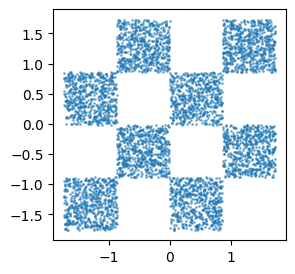

In [ ]:
plt.figure(figsize=(3, 3))
plt.scatter(train_data.numpy()[:,0], train_data.numpy()[:,1], s=1.0, alpha=0.5)
plt.show()

It's also good to visualize the density as sometimes generative models overfit particular region of space. Once models are trained, when you sample from them, plot the two densities side-by-side to compare real & synthetic dataset.

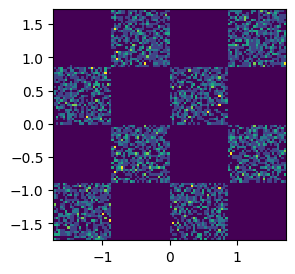

In [ ]:
plt.figure(figsize=(3, 3))
plt.hist2d(train_data.numpy()[:,0], train_data.numpy()[:,1], bins=100)
plt.show()

#### Moon (use this one only if your models struggle on checkerboard)

In [ ]:
import torch
import math
from sklearn import datasets
import numpy as np

# Our dataset is mathematically defined, we can generate batches on the fly and enjoy
# an infinite-size dataset
def generate_batch(batchlen):
    """This function generates a batch of length 'batchlen' from the dataset
    """
    data = datasets.make_moons(n_samples=batchlen, noise=0.05)[0].astype(np.float32)
    return torch.from_numpy(data)

Let's plot a large batch, to see what the dataset looks like.

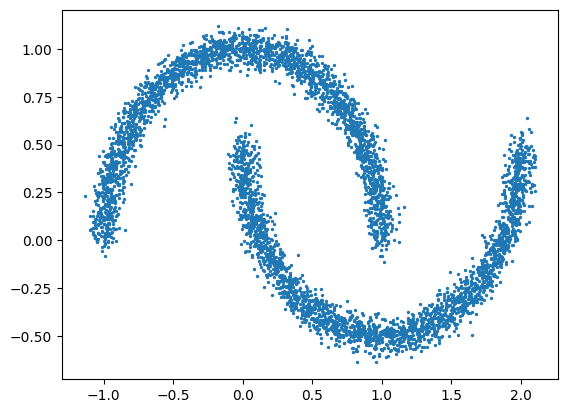

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

batch = generate_batch(5000)

plt.scatter(batch[:,0], batch[:,1], s=2.0)
plt.show()

It's also good to visualize the density as sometimes generative models overfit particular areas. Once models are trained, when you sample from them, plot the two densities side-by-side to compare real & synthetic dataset.

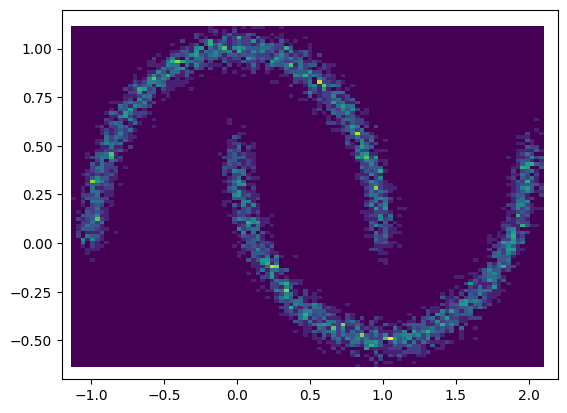

In [ ]:
plt.hist2d(batch.numpy()[:,0], batch.numpy()[:,1], bins=100)
plt.xlim([-1.2,2.2])
plt.ylim([-0.7,1.2])
plt.show()

----
### Generative Adversarial Networks

GANs structure is based on modelling the distribution $p_\theta$ as a learned deterministic function applied to a standard noise. Sampling from it is thus done as follows: first, some noise is sampled from a standard N-dimensional Gaussian distribution: $\epsilon \sim \mathcal{N}(0;I)$, and then the output is computed as a deterministic function $x = f_\theta(\epsilon)$. The function $f_\theta$ is implemented as a neural network, $\theta$ representing its learned parameters.

**Q3: What is, a priori, the impact of the choice of N, the dimension of the input noise $\epsilon$?**

> <font color = blue> The dimension $N$ of the input noise $\epsilon$ in GANs significantly impacts the complexity and variety of the generated data. Indeed, more elements in the noise allow the system to capture a wider range of features from the real data it is trying to imitate, allowing for the generation of more complex and varied data. However, the trade-off is that it also makes the training process more challenging and can lead to issues like mode collapse (in other words, limited type of output, as discussed in Q2). Additionally, the dimensionality influences how complex the model needs to be; a higher-dimensional noise vector may require a more complex generator network, increasing computational complexity and the risk of overfitting. The choice of $N$ also affects the structure of the latent space, affecting the ability to perform meaningful interpolations between generated samples. Paper [2] provides some insights into how the dimensionality of the latent space (which can be analogous to the dimensionality of GAN input noise) affects the quality of generated data and the smoothness of transitions between data points.

> <font color = blue> [2] "Understanding and Improving Interpolation in Autoencoders via an Adversarial Regularizer" by David Berthelot, Colin Raffel, Aurko Roy, and Ian Goodfellow. arXiv:1807.07543.

By construction, this generator structure only allows sampling the distribution $p_\theta$, and does not allow the computation of the density $p_\theta(x)$ (at least not without strong assumptions on $f_\theta$). Such a model thus needs a comparison method based on samples to be trained.

The smart idea of GANs is to instead use another neural network to model the objective. Another neural network is introduced: a classifier (that we call the discriminator) which is trained to distinguish examples from the dataset from examples generated by $p_\theta$. The reasoning is as follows:

The discriminator $D$ is trained using a classic classifier loss between the two classes defined as the samples generated by either $p_D$ or $p_\theta$. This way $D(x)$ can be interpreted as the probability that $x$ came from the real dataset:

$$ \mathcal{L}_D = \mathbb{E}_{p_D} \left[ -\log D(x) \right] + \mathbb{E}_{p_\theta} \left[ -\log \left(1-D(x)\right) \right] $$

From that, it can be shown that for the generator fixed, the optimal discriminator is given by $D(x) = \frac{p_D(x)}{p_\theta(x) + p_D(x)}$, and when reached its loss takes a specific value:

$$ \mathcal{L}_D = 2 \left( \log 2 - JSD(p_\theta \| p_D) \right) $$
, where JSD is the JS divergence used to measure the similarity of two distributions.
$$JSD(p_\theta \| p_D) = \frac{1}{2} \mathbb{E}_{p_D} \left[ log(\frac{2p_D}{p_D+p_\theta}) \right] + \frac{1}{2} \mathbb{E}_{p_\theta} \left[ log(\frac{2p_\theta}{p_D+p_\theta}) \right]$$
So, training the generator network to *maximize* the same loss would, assuming the discriminator is always trained to optimality, minimize the Jensen-Shannon Divergence between $p_\theta$ and $p_D$, and thus bring $p_\theta$ closer to $p_D$.

**Q4: Can you anticipate a caveat of using the JSD as a training objective for the generator?**

> <font color = blue> When using the JSD as the training objective for a generator in GANs, an important problem appears if the generator's distribution and the real data distribution are entirely different. In this situation, the JSD can reach its maximum value, leading to a plateau in the loss landscape. This plateau results in the vanishing gradients problem, where the generator receives little to no useful feedback on how to adjust its parameters to better imitate the real data distribution. Therefore, the generator becomes unable to improve and produce more realistic samples. This issue has motivated the apparition of alternative metrics like the Wasserstein distance, which can give us meaningful gradients even when distributions do not overlap, leading to a more stable GAN training. Paper [3] introduces and discusses this concept.

> <font color = blue> [3] Arjovsky, M., Chintala, S., & Bottou, L. (2017). Wasserstein GAN. arXiv:1701.07875.

Having the generator trained to maximize $\mathcal{L}_D$ is equivalent to setting its training loss to $ \mathcal{L}_G = \mathbb{E}_{p_\theta} \log(1-D(x)) $.

**Q5: This loss only gives feedback to the generator on samples it generated, what problem may this cause?**

> <font color = blue> Training the generator in a GAN only based on feedback from its own generated samples can lead to **mode collapse** (where the generator produces a limited variety of outputs, as discussed before). It may also cause **overfitting** to the discriminator's weaknesses instead of learning the real data distribution. Moreover, relying only on the discriminator for feedback doesn't directly assess the quality or realism of generated samples, and this can lead to outputs that are not realistic.

We will now work on implementing a GAN on a simple toy problem, to get a feeling of its behavior and test our theoretical insights. For this we will use the `pytorch` library.

While a real problem would be generating images for example (each datapoint $x$ would then be a different image), this is a kind of task that easily requires intensive CPU/GPU power, and image datasets are difficult to visualize from a geometric point of view (even small images contains hundreds of pixels, and nobody can visualize points in a 100-dimensional space). So instead we will focus on points in the plane: each datapoint $x$ will actually be a couple of numbers $(x1, x2)$, and our target dataset will be a 2D two-moons shape with some noise.

We now need to define our two neural networks, the generator and the discriminator. The generator will take as input a value $z$ sampled from a Gaussian prior, and output a value $x$ (thus a couple $(x_1,x_2)$). The discriminator takes as input a value $x$, and is a binary classifier.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

# Choose a value for the prior dimension
PRIOR_N = 2

# Define the generator
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(PRIOR_N, 2)

    def __call__(self, z):
        return self.fc1(z)

    def generate(self, batchlen):
        z = torch.normal(torch.zeros(batchlen, PRIOR_N), 1.0)
        return self.__call__(z)


# Define the discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 1)

    def __call__(self, x):
        return self.fc1(x)

With these classes in shape, now is only needed the training loop. To stick with the mathematical GAN framework, we should train the discriminator until convergence between each training step of the generator. This is not practical for two reasons: first it takes a lot of time, and second if the discriminator is too good, it will generate vanishing gradients to the generator (as seen in **Q4**).

We will thus train the discriminator a fixed number of times between each training iteration of the generator.

step 0: discriminator: 1.431e+00, generator: 1.223e+00


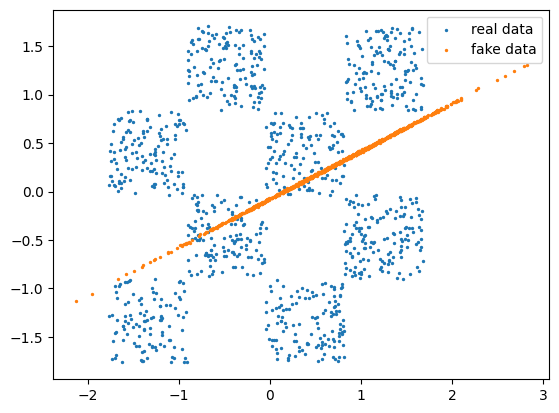

step 1000: discriminator: 1.387e+00, generator: 6.929e-01


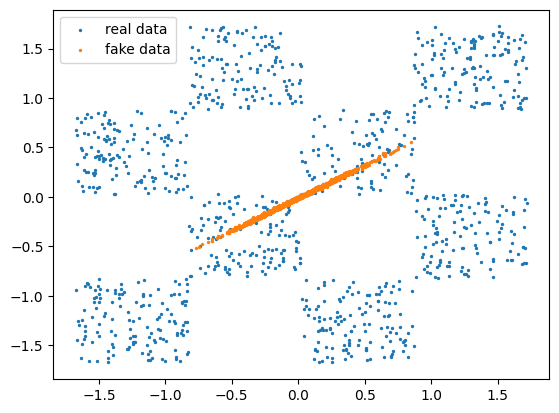

step 2000: discriminator: 1.386e+00, generator: 6.933e-01


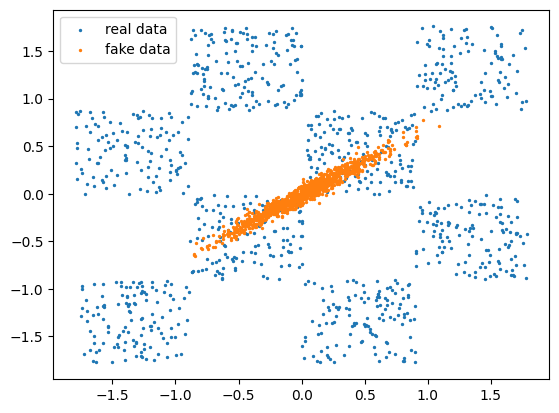

step 3000: discriminator: 1.386e+00, generator: 6.931e-01


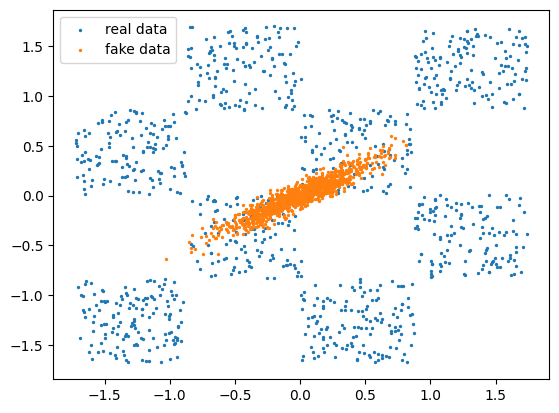

step 4000: discriminator: 1.387e+00, generator: 6.934e-01


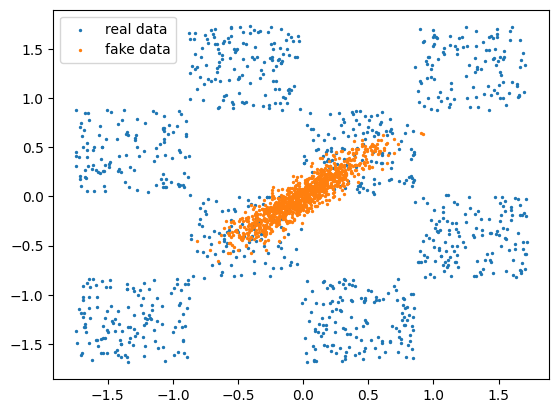

step 5000: discriminator: 1.386e+00, generator: 6.931e-01


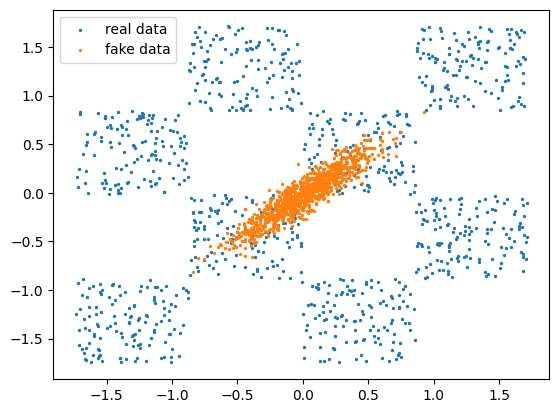

step 6000: discriminator: 1.386e+00, generator: 6.933e-01


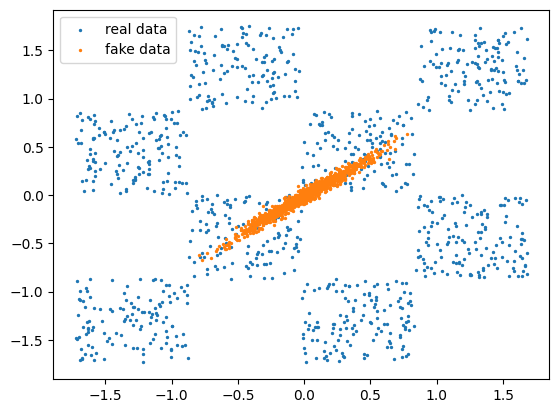

step 7000: discriminator: 1.386e+00, generator: 6.933e-01


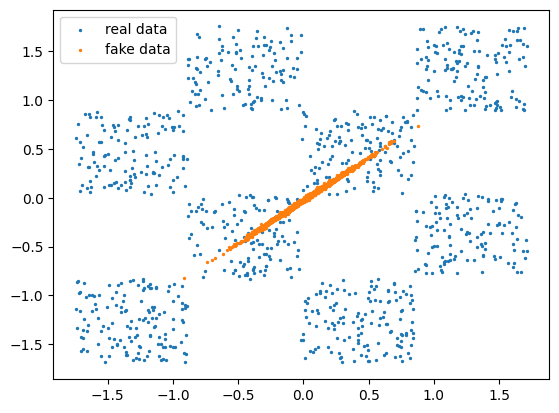

step 8000: discriminator: 1.386e+00, generator: 6.932e-01


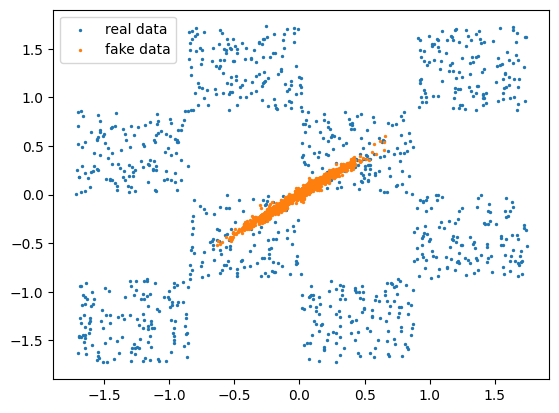

step 9000: discriminator: 1.386e+00, generator: 6.931e-01


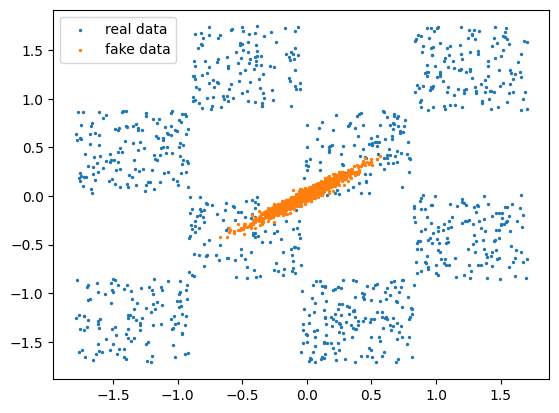

step 10000: discriminator: 1.386e+00, generator: 6.930e-01


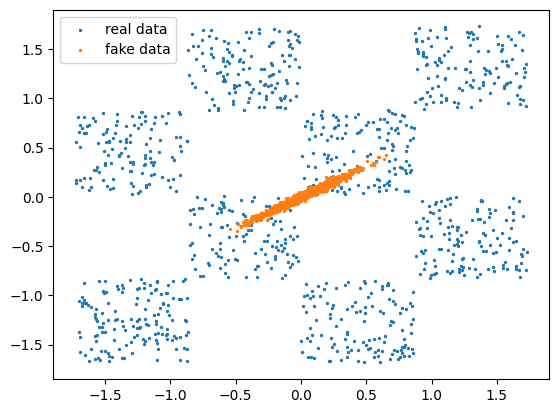

step 11000: discriminator: 1.386e+00, generator: 6.931e-01


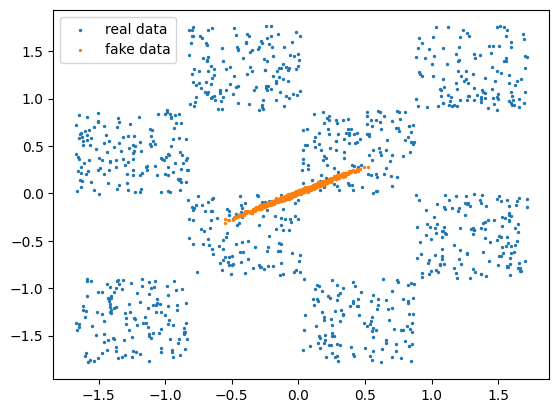

step 12000: discriminator: 1.386e+00, generator: 6.931e-01


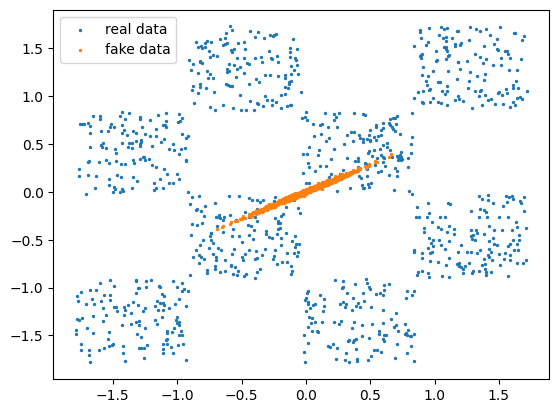

step 13000: discriminator: 1.386e+00, generator: 6.933e-01


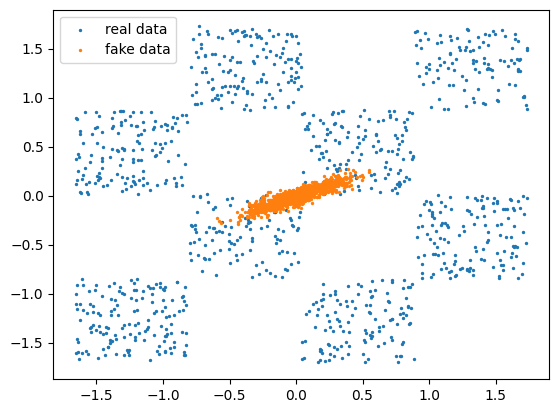

step 14000: discriminator: 1.386e+00, generator: 6.932e-01


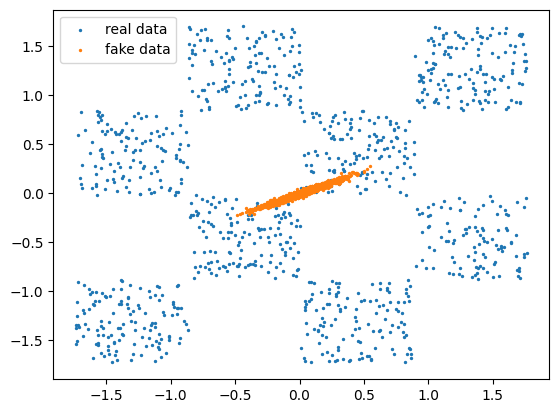

step 15000: discriminator: 1.386e+00, generator: 6.930e-01


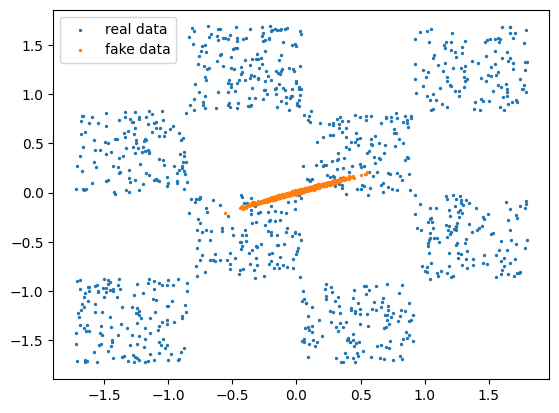

step 16000: discriminator: 1.386e+00, generator: 6.931e-01


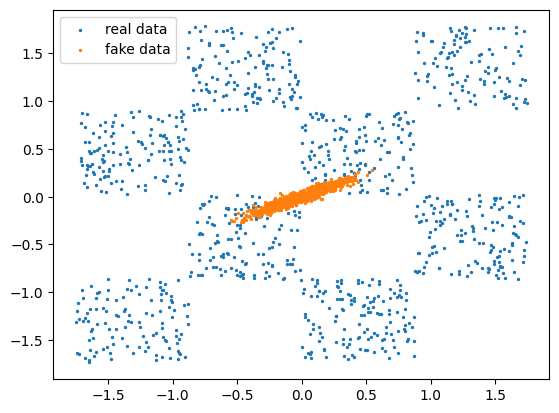

step 17000: discriminator: 1.386e+00, generator: 6.930e-01


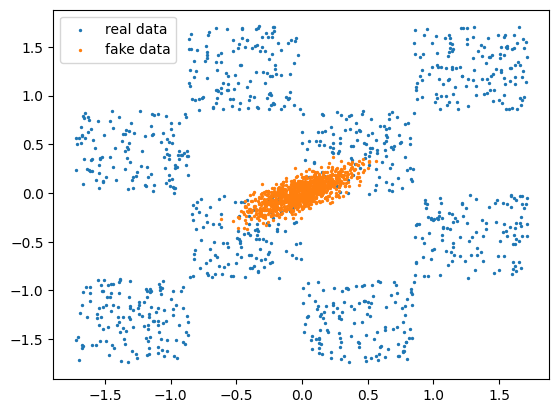

step 18000: discriminator: 1.386e+00, generator: 6.930e-01


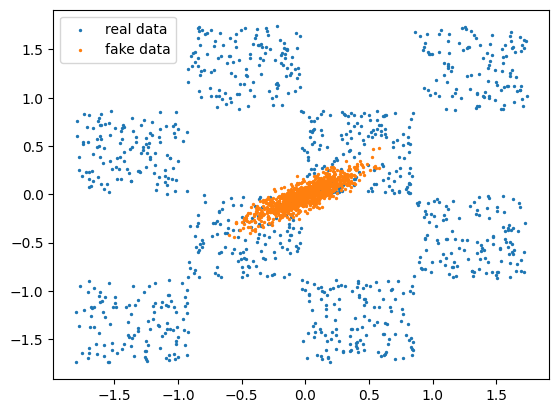

step 19000: discriminator: 1.386e+00, generator: 6.931e-01


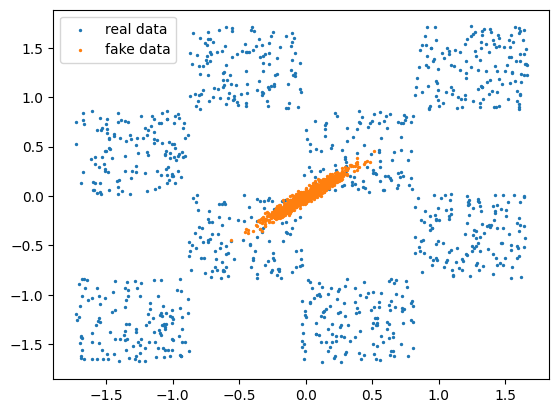

step 20000: discriminator: 1.386e+00, generator: 6.932e-01


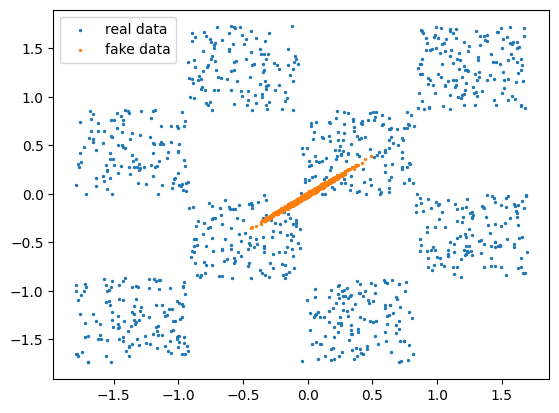

In [ ]:
# Number of times to train the discriminator between two generator steps
TRAIN_RATIO = 1
# Total number of training iterations for the generator
N_ITER = 20001
# Batch size to use
BATCHLEN = 128

generator = Generator()
optim_gen = torch.optim.Adam(generator.parameters(), lr=0.001, betas=(0.5,0.9))
discriminator = Discriminator()
optim_disc = torch.optim.Adam(discriminator.parameters(), lr=0.001, betas=(0.5,0.9))

for i in range(N_ITER):
    # train the discriminator
    for _ in range(TRAIN_RATIO):
        discriminator.zero_grad()
        real_batch = generate_batch(BATCHLEN)
        fake_batch = generator.generate(BATCHLEN)
        #
        # == COMPUTE THE DISCRIMINATOR LOSS HERE ==
        real_outputs = discriminator(real_batch)
        fake_outputs = discriminator(fake_batch)
        disc_loss = F.softplus(-real_outputs) + F.softplus(fake_outputs)
        disc_loss = disc_loss.mean()
        #
        disc_loss.backward()
        optim_disc.step()
    # train the generator
    generator.zero_grad()
    fake_batch = generator.generate(BATCHLEN)
    #
    # == COMPUTE THE GENERATOR LOSS HERE
    fake_outputs = discriminator(fake_batch)
    gen_loss = F.softplus(-fake_outputs)
    gen_loss = gen_loss.mean()
    gen_loss.backward()
    optim_gen.step()
    if i%1000 == 0:
        print('step {}: discriminator: {:.3e}, generator: {:.3e}'.format(i, float(disc_loss), float(gen_loss)))
        # plot the result
        real_batch = generate_batch(1024)
        fake_batch = generator.generate(1024).detach()
        plt.scatter(real_batch[:,0], real_batch[:,1], s=2.0, label='real data')
        plt.scatter(fake_batch[:,0], fake_batch[:,1], s=2.0, label='fake data')
        plt.legend()
        plt.show()

Complete the previous code and train your model.

Depending on your choice of parameters, the training may not go well at all, with the generator completely collapsing quickly at the beginning of the training. It has been observed by the litterature that the generator's loss $\mathcal{L}_G = \mathbb{E}_{p_\theta} \log(1-D(x))$ is often to blame.

**Q6: Why could we anticipate that this loss could cause this?**

> <font color = blue> This generator's loss can lead to gradient vanishing when the discriminator gets too good. This happens because as the discriminator improves, $1 - D(x)$ for generated samples $x$ becomes very small, making the gradient of $\log(1 - D(x))$ towards the generator's parameters nearly zero.  Consequently, the generator gets little feedback for adjustments, potentially leading to early training stagnation.

This issue is solved by replacing the generator loss by an alternative loss: $\mathcal{L}_G = \mathbb{E}_{p_\theta} [ -\log D(x) ]$ to avoid gradient vanishing.

**Q7: Inspect the impact of these different factors:**

- depth / width of the generator network
- depth / width of the discriminator network
- impact of `TRAIN_RATIO`

In [ ]:
# We first re-implement the Generator and the Discriminator to dynamically adjust the depth and width

import torch.nn as nn
import torch.nn.functional as F

PRIOR_N = 2

class Generator_v2(nn.Module):
    def __init__(self, width, depth, PRIOR_N):
        super().__init__()
        self.width = width
        self.depth = depth
        self.PRIOR_N = PRIOR_N
        self.fc1 = nn.Linear(PRIOR_N, self.width)
        self.layers = nn.ModuleList()
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        for i in range(self.depth):
          self.layers.append(nn.Linear(self.width,self.width))
        self.fc2 = nn.Linear(self.width, 2)

    def __call__(self, z):
        z = self.fc1(z)
        z = F.relu(z)
        for l in self.layers:
          z = F.relu(l(z))
        return self.fc2(z)

    def generate(self, batchlen):
        z = torch.normal(torch.zeros(batchlen, PRIOR_N), 1.0).to(self.device)
        return self.__call__(z)


class Discriminator_v2(nn.Module):
    def __init__(self, width, depth, PRIOR_N):
        super().__init__()
        self.width = width
        self.depth = depth

        self.fc1 = nn.Linear(2, self.width)
        self.layers = nn.ModuleList()
        for i in range(self.depth):
          self.layers.append(nn.Linear(self.width,self.width))
        self.fc2 = nn.Linear(self.width, 1)

    def __call__(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        for l in self.layers:
          x = F.relu(l(x))
        return self.fc2(x)

In [ ]:
# We now create a train function to adjust the hyperparameters dynamically and tu use CUDA


def train(TRAIN_RATIO, depth_g, width_g, depth_d, width_d) :

  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

  N_ITER = 20001
  BATCHLEN = 128

  generator = Generator_v2(width = width_g, depth=depth_g, PRIOR_N = PRIOR_N).to(device)
  optim_gen = torch.optim.Adam(generator.parameters(), lr=0.001, betas=(0.5,0.9))
  discriminator = Discriminator_v2(width = width_d, depth=depth_d, PRIOR_N = PRIOR_N).to(device)
  optim_disc = torch.optim.Adam(discriminator.parameters(), lr=0.001, betas=(0.5,0.9))

  for i in range(N_ITER):
      # train the discriminator
      for _ in range(TRAIN_RATIO):
          discriminator.zero_grad()
          real_batch = generate_batch(BATCHLEN).to(device)
          fake_batch = generator.generate(BATCHLEN)
          #
          # == COMPUTE THE DISCRIMINATOR LOSS HERE ==
          real_outputs = discriminator(real_batch)
          fake_outputs = discriminator(fake_batch)
          disc_loss = F.softplus(-real_outputs) + F.softplus(fake_outputs)
          disc_loss = disc_loss.mean()
          #
          disc_loss.backward()
          optim_disc.step()
      # train the generator
      generator.zero_grad()
      fake_batch = generator.generate(BATCHLEN)
      #
      # == COMPUTE THE GENERATOR LOSS HERE
      fake_outputs = discriminator(fake_batch)
      gen_loss = F.softplus(-fake_outputs)
      gen_loss = gen_loss.mean()
      #
      gen_loss.backward()
      optim_gen.step()

  print("Final metrics after {} iterations : discriminator: {:.3e}, generator: {:.3e}".format(N_ITER, float(disc_loss), float(gen_loss)))
  real_batch = generate_batch(1024).to(device)
  fake_batch = generator.generate(1024).detach().to(device)
  plt.figure(figsize = (8,3) )
  plt.scatter(real_batch[:,0].cpu().numpy(), real_batch[:,1].cpu().numpy(), s=2.0, label='real data')
  plt.scatter(fake_batch[:,0].cpu().numpy(), fake_batch[:,1].cpu().numpy(), s=2.0, label='fake data')
  plt.legend()
  plt.show()


 Hyperparameters: Train Ratio = 1 | Generator (Depth,Width) = (2, 10) | Discriminator (Depth,Width) = (2,10)
Final metrics after 20001 iterations : discriminator: 1.355e+00, generator: 7.005e-01


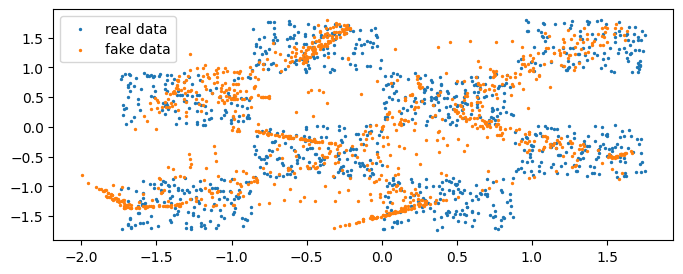


 Hyperparameters: Train Ratio = 1 | Generator (Depth,Width) = (2, 10) | Discriminator (Depth,Width) = (15,10)
Final metrics after 20001 iterations : discriminator: 1.386e+00, generator: 6.932e-01


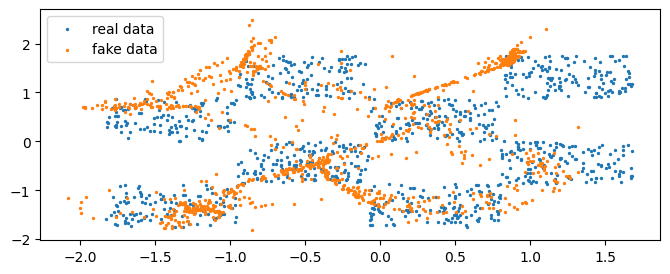


 Hyperparameters: Train Ratio = 1 | Generator (Depth,Width) = (15, 10) | Discriminator (Depth,Width) = (2,10)
Final metrics after 20001 iterations : discriminator: 1.403e+00, generator: 7.933e-01


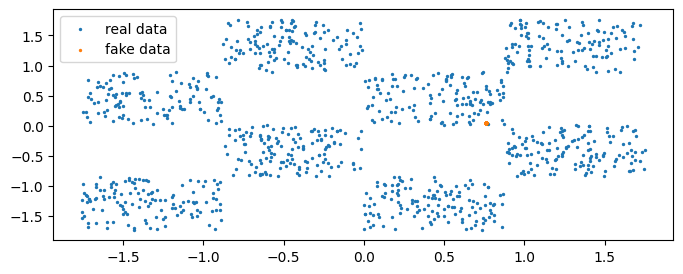


 Hyperparameters: Train Ratio = 1 | Generator (Depth,Width) = (15, 10) | Discriminator (Depth,Width) = (15,10)
Final metrics after 20001 iterations : discriminator: 1.386e+00, generator: 6.931e-01


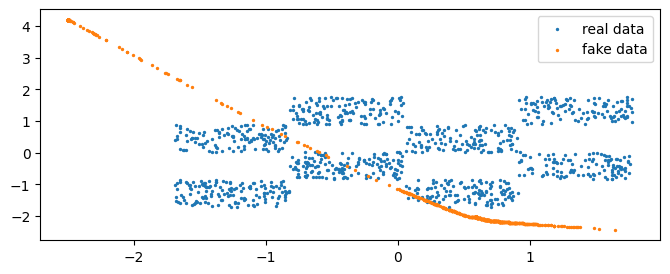


 Hyperparameters: Train Ratio = 1 | Generator (Depth,Width) = (2, 50) | Discriminator (Depth,Width) = (2,50)
Final metrics after 20001 iterations : discriminator: 1.382e+00, generator: 6.913e-01


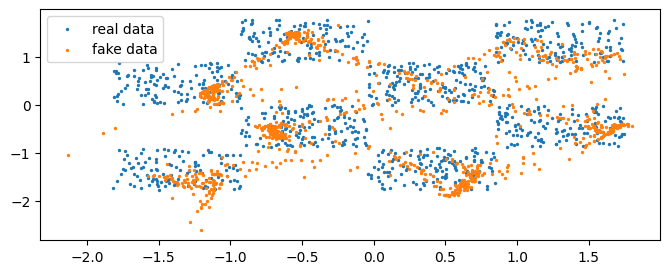


 Hyperparameters: Train Ratio = 1 | Generator (Depth,Width) = (2, 50) | Discriminator (Depth,Width) = (15,50)
Final metrics after 20001 iterations : discriminator: 1.386e+00, generator: 6.930e-01


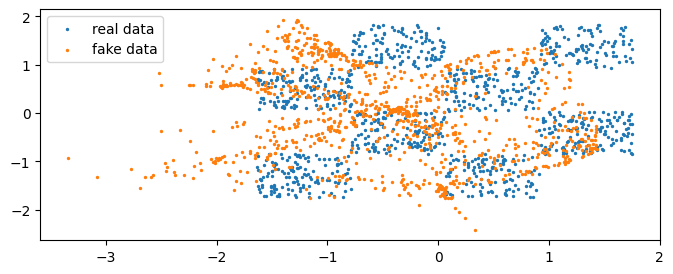


 Hyperparameters: Train Ratio = 1 | Generator (Depth,Width) = (15, 50) | Discriminator (Depth,Width) = (2,50)
Final metrics after 20001 iterations : discriminator: 6.363e-01, generator: 1.863e+00


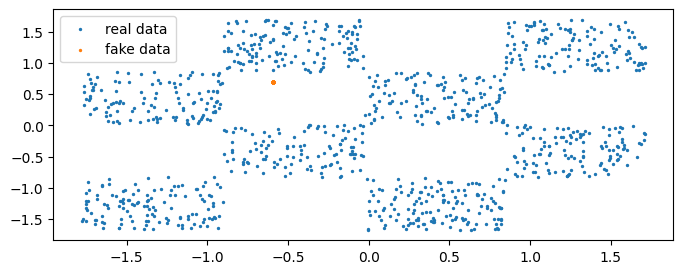


 Hyperparameters: Train Ratio = 1 | Generator (Depth,Width) = (15, 50) | Discriminator (Depth,Width) = (15,50)
Final metrics after 20001 iterations : discriminator: 1.386e+00, generator: 6.931e-01


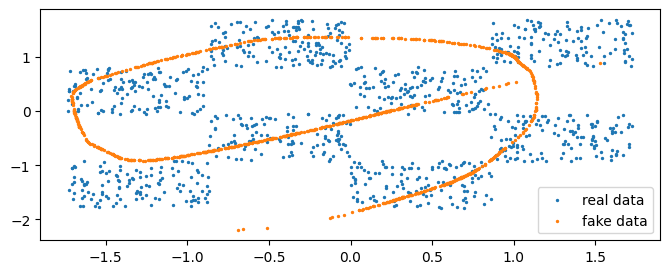


 Hyperparameters: Train Ratio = 1 | Generator (Depth,Width) = (2, 100) | Discriminator (Depth,Width) = (2,100)
Final metrics after 20001 iterations : discriminator: 1.390e+00, generator: 6.863e-01


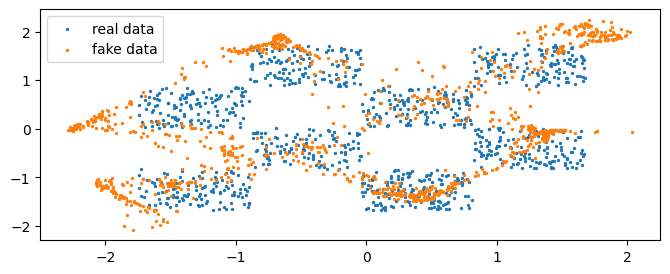


 Hyperparameters: Train Ratio = 1 | Generator (Depth,Width) = (2, 100) | Discriminator (Depth,Width) = (15,100)
Final metrics after 20001 iterations : discriminator: 1.384e+00, generator: 7.236e-01


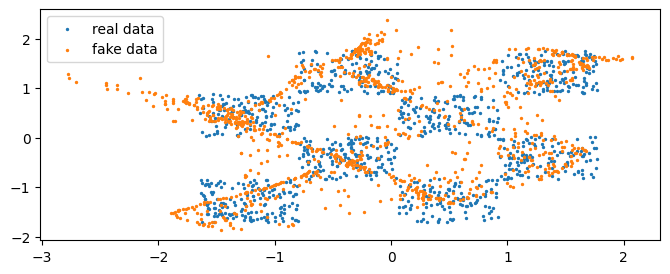


 Hyperparameters: Train Ratio = 1 | Generator (Depth,Width) = (15, 100) | Discriminator (Depth,Width) = (2,100)
Final metrics after 20001 iterations : discriminator: 1.104e+00, generator: 1.633e+00


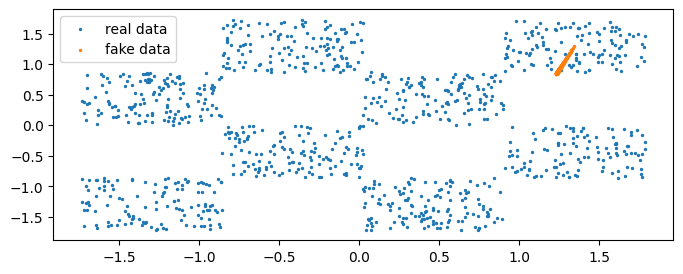


 Hyperparameters: Train Ratio = 1 | Generator (Depth,Width) = (15, 100) | Discriminator (Depth,Width) = (15,100)
Final metrics after 20001 iterations : discriminator: 1.386e+00, generator: 6.931e-01


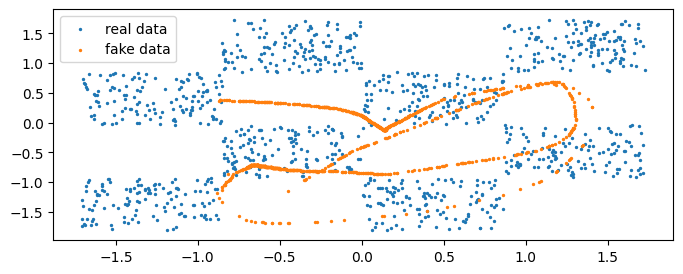


 Hyperparameters: Train Ratio = 5 | Generator (Depth,Width) = (2, 10) | Discriminator (Depth,Width) = (2,10)
Final metrics after 20001 iterations : discriminator: 1.368e+00, generator: 7.217e-01


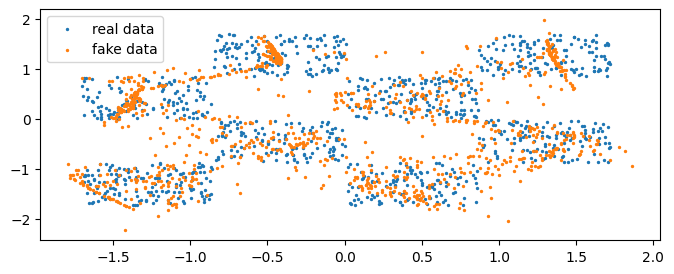


 Hyperparameters: Train Ratio = 5 | Generator (Depth,Width) = (2, 10) | Discriminator (Depth,Width) = (15,10)
Final metrics after 20001 iterations : discriminator: 1.306e+00, generator: 7.833e-01


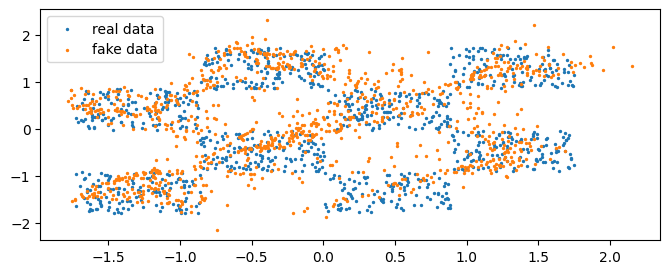


 Hyperparameters: Train Ratio = 5 | Generator (Depth,Width) = (15, 10) | Discriminator (Depth,Width) = (2,10)
Final metrics after 20001 iterations : discriminator: 1.068e+00, generator: 1.151e+00


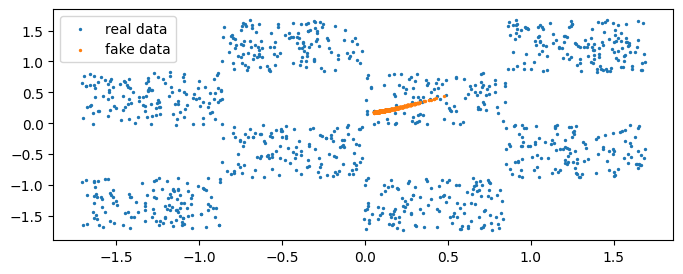


 Hyperparameters: Train Ratio = 5 | Generator (Depth,Width) = (15, 10) | Discriminator (Depth,Width) = (15,10)
Final metrics after 20001 iterations : discriminator: 1.350e+00, generator: 8.368e-01


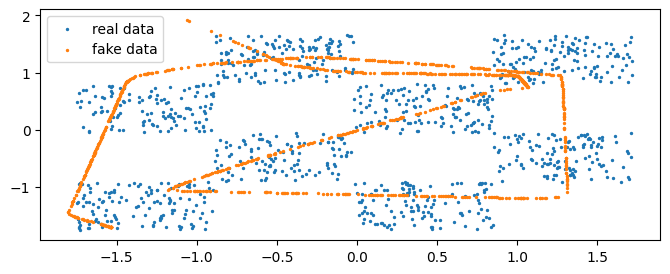


 Hyperparameters: Train Ratio = 5 | Generator (Depth,Width) = (2, 50) | Discriminator (Depth,Width) = (2,50)
Final metrics after 20001 iterations : discriminator: 1.387e+00, generator: 6.886e-01


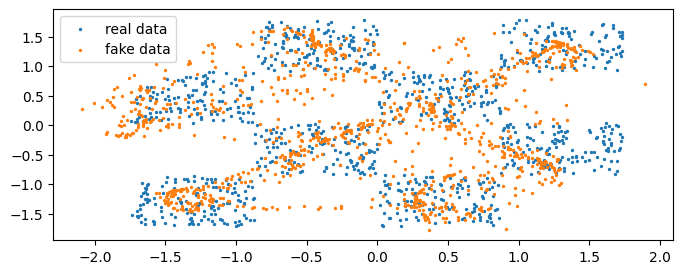


 Hyperparameters: Train Ratio = 5 | Generator (Depth,Width) = (2, 50) | Discriminator (Depth,Width) = (15,50)
Final metrics after 20001 iterations : discriminator: 1.386e+00, generator: 6.933e-01


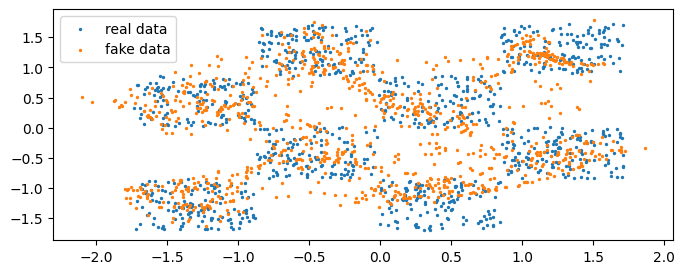


 Hyperparameters: Train Ratio = 5 | Generator (Depth,Width) = (15, 50) | Discriminator (Depth,Width) = (2,50)
Final metrics after 20001 iterations : discriminator: 1.386e+00, generator: 6.931e-01


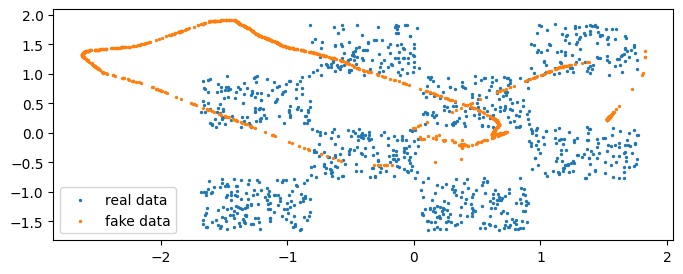


 Hyperparameters: Train Ratio = 5 | Generator (Depth,Width) = (15, 50) | Discriminator (Depth,Width) = (15,50)
Final metrics after 20001 iterations : discriminator: 1.369e+00, generator: 6.657e-01


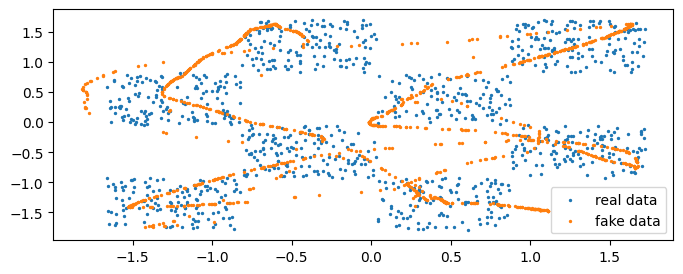


 Hyperparameters: Train Ratio = 5 | Generator (Depth,Width) = (2, 100) | Discriminator (Depth,Width) = (2,100)
Final metrics after 20001 iterations : discriminator: 1.386e+00, generator: 6.913e-01


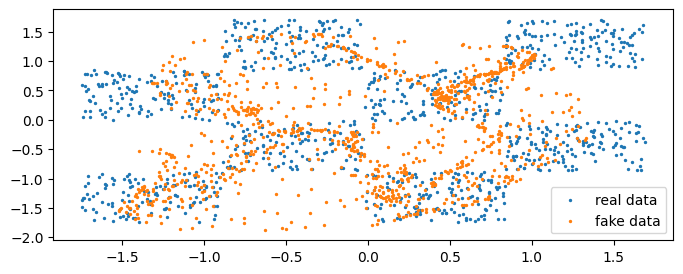


 Hyperparameters: Train Ratio = 5 | Generator (Depth,Width) = (2, 100) | Discriminator (Depth,Width) = (15,100)
Final metrics after 20001 iterations : discriminator: 1.386e+00, generator: 6.931e-01


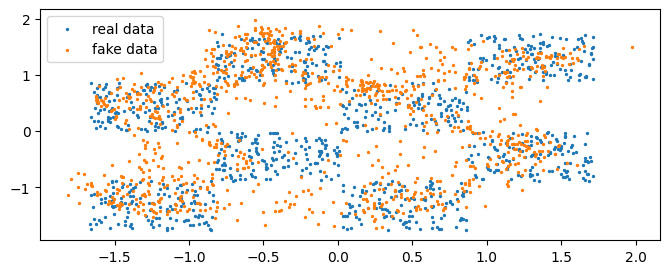


 Hyperparameters: Train Ratio = 5 | Generator (Depth,Width) = (15, 100) | Discriminator (Depth,Width) = (2,100)
Final metrics after 20001 iterations : discriminator: 1.399e+00, generator: 7.098e-01


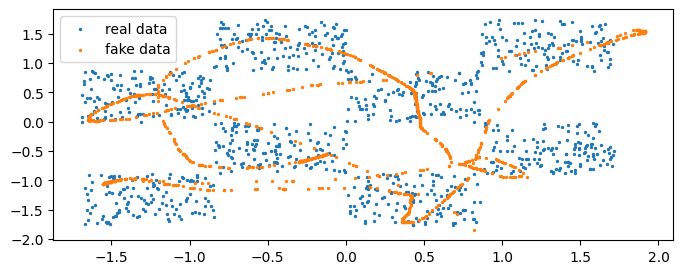


 Hyperparameters: Train Ratio = 5 | Generator (Depth,Width) = (15, 100) | Discriminator (Depth,Width) = (15,100)
Final metrics after 20001 iterations : discriminator: 1.386e+00, generator: 6.931e-01


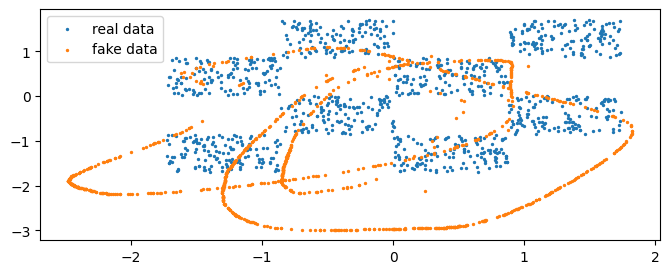

In [ ]:
# For simplicity (otherwise too many outputs and computational requirements), we assume that the width is the same for the generator and the disciminator

for TRAIN_RATIO in [1,5]:
    for width_g in [10,50,100]:
        for depth_g in [2,15]:
            for depth_d in [2,15]:
                print(f"\n Hyperparameters: Train Ratio = {TRAIN_RATIO} | Generator (Depth,Width) = ({depth_g}, {width_g}) | Discriminator (Depth,Width) = ({depth_d},{width_g})")
                train(TRAIN_RATIO, depth_g, width_g, depth_d, width_g)


 Hyperparameters: Train Ratio = 10 | Generator (Depth,Width) = (2, 100) | Discriminator (Depth,Width) = (50,100)
Final metrics after 20001 iterations : discriminator: 1.386e+00, generator: 6.932e-01


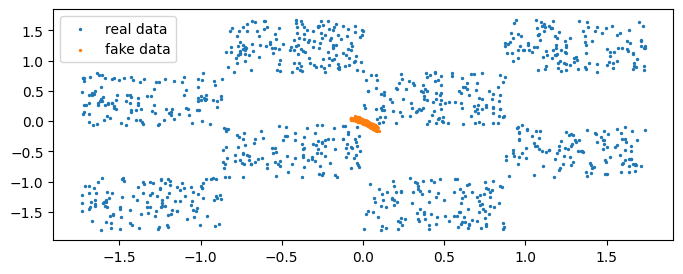

In [ ]:
# We try one execution by increasing a lot the discriminator hyperparameters, and setting the train ratio to 10

TRAIN_RATIO = 10
depth_g, width_g, depth_d = 2, 100, 50
print(f"\n Hyperparameters: Train Ratio = {TRAIN_RATIO} | Generator (Depth,Width) = ({depth_g}, {width_g}) | Discriminator (Depth,Width) = ({depth_d},{width_g})")
train(TRAIN_RATIO, depth_g, width_g, depth_d, width_g)

> <font color = blue> In order to test the impact of the requested factors, we conducted experiments by varying its parameters to understand their effects and derive insights. The parameters we altered to generate different setups were:
- <font color = blue> TRAIN_RATIO: [1,5]
- <font color = blue> Generator's Depth: [2,15]
- <font color = blue> Discriminator's Depth: [2,15]
- <font color = blue> Width (applicable to both generator and discriminator): [10,50,100]

> <font color = blue> **Effects of varying TRAIN_RATIO:**

> <font color = blue> Our experiments did not demonstrated much differences when using different TRAIN_RATIO values. We can imagine that a higher ratio ensures the discriminator is robust enough to guide the generator, but too high can lead to the discriminator overpowering the generator, affecting the generator's ability to learn. This can be seen in the last example, where we deduce that a TRAIN_RATIO of 10 is too hight to let the generator learn.

> <font color = blue> **Effects of Generator and Discriminator Depth:**

> <font color = blue> We noted that having a discriminator deeper than the generator facilitates a better data fit. In contrast, a deeper generator compared to the discriminator leads to bad sample generation and data fitting.

> <font color = blue> **Impact of Generator and Discriminator Width:**

> <font color = blue> Our findings indicate that greater width values such as 100 compromise the performance of both the generator and discriminator. By tuning adequately the depth and the TRAIN_RATIO, we are able to observe satisfying results with a width of 10.

> <font color = blue> The final example shows that simply taking bigger parameters without careful consideration is counterproductive.



For further readings on GANs, you can see the following papers:

- Generative Adversarial Networks *(Goodfellow et al.)*: [arXiv:1406.2661](https://arxiv.org/abs/1406.2661)
- Unsupervised Representation Learning with Deep Convolutional Generative Adversarial Networks *(Radford et al.)*: [arXiv:1511.06434](https://arxiv.org/abs/1511.06434)
- A Style-Based Generator Architecture for Generative Adversarial Networks *(Karras et al.)* [arxiv:1812.04948v3](https://arxiv.org/abs/1812.04948v3)

----
### Variational AutoEncoders

Another well-known approach to generative modelling is embodied by Variational AutoEncoders (VAEs). While the generative model itself and the procedure to sample it is similar to GANs, the way it is trained is not.

The main goal of VAEs is to optimize the likelihood of the real data according to the generative model. In other words, maximize $\mathbb{E}_{p_D} \left[\log p_\theta(x) \right ]$, which is equivalent to minimizing $D_{KL}(p_D \| p_\theta)$.
$$D_{KL}(p_D \| p_\theta) = \mathbb{E}_{p_D}\left[ log(\frac{p_D}{p_\theta}) \right]$$

**Q8: Prove this equivalence.**

> <font color = blue> By exploiting the linearity of the expectation, we have:
>
> <font color = blue> $$D_{KL}(p_D \| p_\theta) = \mathbb{E}_{p_D}\left[ log(\frac{p_D}{p_\theta}) \right] = \mathbb{E}_{p_D}\left[ log(p_D) \right] - \mathbb{E}_{p_D}\left[ log(p_\theta) \right]$$
> <br>
> But $ \mathbb{E}_{p_D}\left[ log(p_D) \right] $ doesn't depend on $\theta$. Therefore, maximizing $\mathbb{E}_{p_D} \left[\log p_\theta(x) \right ]$is equivalent to minimizing $D_{KL}(p_D \| p_\theta)$.




However, the classes of distributions for which $\log p_\theta(x)$ can be analytically computed and optimized is very restricted, and not suitable for real world problems. The main idea of the VAE is thus to introduce a latent variable $z$ and decompose the distribution as: $p_\theta(x, z) = p_\theta(x | z) p(z)$. Here $p(z)$ is some fixed prior and $p_\theta(x | z)$ is a simple distribution whose parameters are the output of a neural network.

For example, you could have $p(z)$ be a standard $\mathcal{N}(0;1)$ and $p_\theta(x | z)$ be defined as a gaussian $\mathcal{N}(\mu_\theta(z); \sigma_\theta(z))$ where $\mu_\theta(z)$ and $\sigma_\theta(z)$ are created by the neural network you will train. In this case, the resulting distribution $p_\theta(x) = \int_z p_\theta(x|z)p(z)dz$ is an infinite mixture of Gaussians, which is a much more expressive class of distributions.

Now, this cannot stop here, as we are not able to analitically compute the density $p_\theta(x)$. The second main idea of the VAE is to introduce another, auxilliary distribution: $q_\phi(z | x)$, which will be modelled by a neural network similarly to $p_\theta(x | z)$. Introducing it allows us to create a lower bound for $\log p_\theta(x)$:

$$\log p_\theta(x) = \mathbb{E}_{z \sim q_\phi} \log p_\theta(x) = \mathbb{E}_{z \sim q_\phi} \left[ \log p_\theta(x) \frac {q_\phi(z|x)}{q_\phi(z|x)} \right]$$

Following Bayes theorem, $p_\theta(x) p_\theta(z|x) = p_\theta(x, z) = p_\theta(x|z) p(z)$, so we get:

$$\log p_\theta(x) = \mathbb{E}_{z \sim q_\phi} \left[ \log \frac{p_\theta(x|z) p(z)}{p_\theta(z|x)} \frac {q_\phi(z|x)}{q_\phi(z|x)} \right]$$

Re-organizing the terms:

$$\log p_\theta(x) = \mathbb{E}_{z \sim q_\phi} \log \frac{q_\phi(z|x)}{p_\theta(z|x)} + \mathbb{E}_{z \sim q_\phi} \log \frac{p(z)}{q_\phi(z|x)} + \mathbb{E}_{z \sim q_\phi} \log p_\theta(x | z)$$

This can be re-expressed like so:

$$\log p_\theta(x) = D_{KL}(q_\phi(z | x) \| p_\theta(z | x)) - D_{KL}(q_\phi(z | x) \| p(z)) + \mathbb{E}_{z \sim q_\phi} \log p_\theta(x|z)$$

The 3 terms of this equality can be interpreted like so:

- the first term measures how much $q_\phi(z | x)$ is similar to $p_\theta(z | x)$, or in other words is a good inverse of $p_\theta(x | z)$
- the second term measures how similar $q_\phi(z|x)$ is from the latent prior $p(z)$
- the third term is linked to how likely $p_\theta$ is to yield the given $x$ when $z$ is sampled from $q_\phi(z | x)$ rather than $p(z)$

It is interesting to note that the first term, being a KL-divergence is always positive. As such the combination of the last two terms forms a lower bound of $\log p_\theta(x)$ which *can* be computed and used as a training objective. This bound is called the *Evidence Lower-Bound (ELBO)*. Simply flipping its sign can make it into a loss that can be minimized by gradient descent:

$$ \mathcal{L}_{ELBO} = D_{KL}(q_\phi(z | x) \| p(z)) + \mathbb{E}_{z \sim q_\phi} [ - \log p_\theta(x|z) ]$$

From this formulation comes the parallel with auto-encoders that give the VAE its name: $q_\phi(z | x)$ can be seen as a *probabilistic encoder* from the data $x$ to the latent space $z$, and $p_\theta(x | z)$ can be seen as a *probabilistic decoder* from the latent space $z$ to the data $x$. In this case the second term of $\mathcal{L}_{ELBO}$ is the loss measuring the reconstruction quality of the auto-encoder, and the first term can be seens as a regularization of the latent space.

![VAE](./vae-gaussian.png)

**Q9: We can see that $p(z)$ is never sampled during the training process, how can that be a problem?**

> <font color = blue> When the probability distribution $p(z)$ isn't adequately sampled during training, it can lead to poor approximations. Moreover, there's a risk of overfitting the model to these inadequate approximations, which diminishes its ability to generalize to different priors. Also, the model might not properly regulate itself to ensure that the data is represented in a consistent and organized manner. This could also make the model less capable of dealing with complex data, reducing its ability to generate diverse and accurate new data points.

A typical choice to represent $q_\phi(z | x)$ is to use a diagonal Gaussian distribution $\mathcal{N}(\mu_\phi(x); Diag(\sigma_\phi^2(x)))$, which makes the KL-divergence term of $\mathcal{L}_{ELBO}$ analytically computable.

**Q10: Assuming $p(z)$ is a $\mathcal{N}(0; Id)$ gaussian, what is the value of $D_{KL}(q_\phi(z | x) \| p(z))$?**

> <font color = blue> As suggested, we suppose that $ q_\phi(z|x) $ is represented as a diagonal Gaussian distribution $ N(\mu_\phi(x); \text{Diag}(\sigma^2_\phi(x))) $ and $ p(z) $ is a standard Gaussian $ N(0, I) $.

> <font color = blue> Following the reasoning provided by [this link](https://mr-easy.github.io/2020-04-16-kl-divergence-between-2-gaussian-distributions/), the formula for the KL divergence between two multivariate Gaussian distributions $ N(\mu_0, \Sigma_0) $ and $ N(\mu_1, \Sigma_1) $ (of dimension $k$) is given by:

> <font color = blue> $$
D_{KL}(N_0 \| N_1) = \frac{1}{2} \left( \text{tr}(\Sigma_1^{-1}\Sigma_0) + (\mu_1 - \mu_0)^\top \Sigma_1^{-1} (\mu_1 - \mu_0) - k + \ln\left(\frac{\det\Sigma_1}{\det\Sigma_0}\right) \right)
$$

> <font color = blue> In our case, we have $ \Sigma_0 = \text{Diag}(\sigma^2_\phi(x)) $ and $ \Sigma_1 = I $, and $ \mu_0 = \mu_\phi(x) $ and $ \mu_1 = 0 $. Therefore, taking into account that $ \Sigma_1^{-1} = I $, $ \text{tr}(I\cdot\Sigma_0) = \sum_i \sigma^2_\phi(x)_i $, $ \ln(\det(I)) = 0 $, and $ \ln(\det(\Sigma_0)) = \sum_i \ln(\sigma^2_\phi(x)_i) $, we finally obtain:

> <font color = blue> $$
D_{KL}(q_\phi(z|x) \| p(z)) = \frac{1}{2} \left( \sum_i (\sigma^2_\phi(x)_i) + \sum_i (\mu_\phi(x)_i)^2 - k - \sum_i \ln(\sigma^2_\phi(x)_i) \right)$$



We will also model $p_\theta(x | z)$ as a diagonal Gaussian $\mathcal{N}(\mu_\theta(z); Diag(\sigma_\theta^2(z)))$.


**Note:** For the following, be careful about the difference between $\mu_\phi, \sigma_\phi$ which define the Gaussian distribution of the *encoder* $q_\phi$ and $\mu_\theta, \sigma_\theta$ which define the Gaussian distribution of the *decoder* $p_\theta$.

**Q11: What is the expression of $-\log p_\theta(x | z)$ for given $x$ and $z$?**

>  <font color = blue> We first notice that $p_\theta(x | z)$ is a Gaussian $\mathcal{N}(\mu_\theta(z);\sigma_\theta(z))$.
Therefore, we have that   $$  p_\theta(x | z) = \frac{1}{(2\pi)^{d/2}|Diag(\sigma_\theta(z)^2)|^{1/2}} \exp \left(-\frac{1}{2} (x-\mu_\theta(z))^TDiag\left(\sigma_\theta(z)^2\right)^{-1}(x-\mu_\theta(z))\right)$$
<br>
To obtain the final expression, it is sufficient to apply the logarithm and changing the sign of the result. We finnaly have:
$$ - \log p_\theta(x | z) = \frac{1}{2}  ( \log |Diag(\sigma_\theta(z)^2)| + d \log (2 \pi)  + (x-\mu_\theta(z))^T Diag(\sigma_\theta(z)^2)^{-1}(x-\mu_\theta(z)) )
 $$

We will build and train a VAE using the same dataset as previously, in order to compare its behavior to GANs. For numerical stability, we will interpret the output of the encoder and decoder networks as $(\mu, \log\sigma^2)$, rather than $(\mu, \sigma)$.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

# Choose a value for the latent dimension
LATENT_N = 10

# Define the generator
class Encoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc_mu = nn.Linear(2, LATENT_N)
        self.fc_logvar = nn.Linear(2, LATENT_N)

    # encode a datapoint. This should return a couple of tensors (mu, logvar) representing
    # the parameters of the Gaussian q_\phi(z | x)
    def __call__(self, x):
        mu = self.fc_mu(x)
        logvar = self.fc_logvar(x)
        return (mu, logvar)


# Define the discriminator
class Decoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc_mu = nn.Linear(LATENT_N, 2)
        self.fc_logvar = nn.Linear(LATENT_N, 2)

    # decode a datapoint. This should return a couple of tensors (mu, logvar) representing
    # the parameters of the Gaussian p_\theta(z | x)
    def __call__(self, z):
        mu = self.fc_mu(z)
        logvar = self.fc_logvar(z)
        return (mu, logvar)

    def generate(self, batchlen):
        z = torch.normal(torch.zeros(batchlen, LATENT_N), 1.0)
        (mu, logvar) = self.__call__(z)
        return torch.normal(mu, torch.exp(0.5*logvar))

From this, the parameters of both networks are trained conjointly using the same loss $\mathcal{L}_{ELBO}$.

step 0: KL: 4.701e+02, rec: 7.025e+02


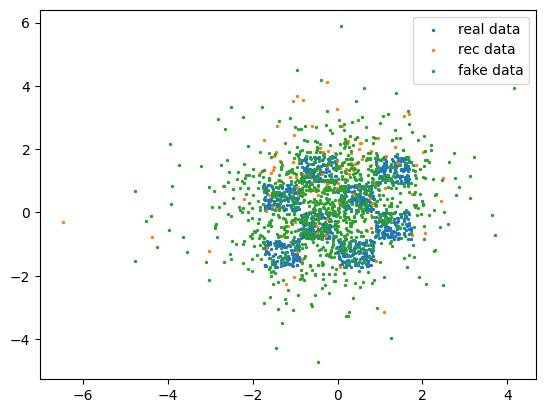

step 1000: KL: 7.570e-05, rec: 7.156e+02


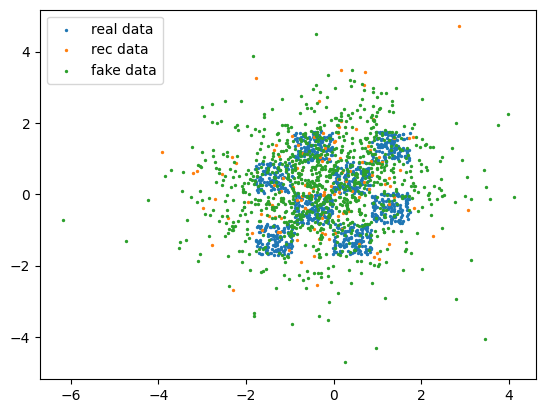

step 2000: KL: 3.311e-05, rec: 7.232e+02


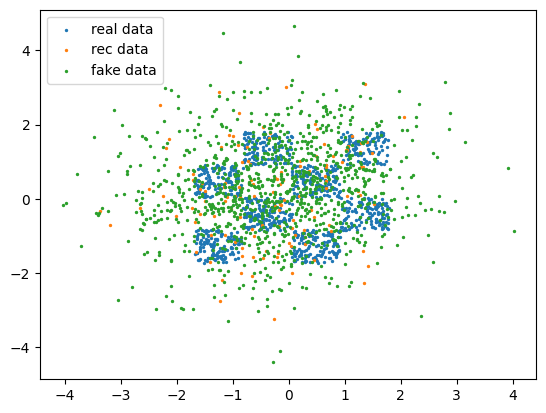

step 3000: KL: 1.028e-04, rec: 5.684e+02


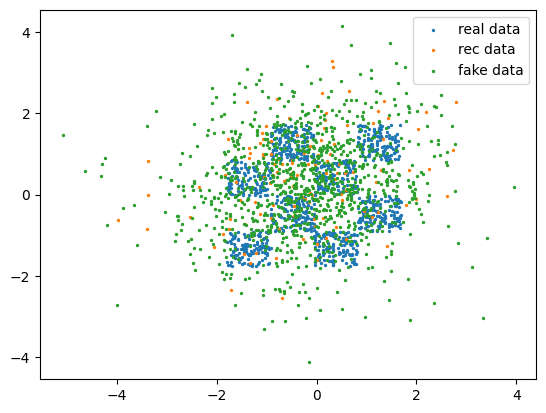

step 4000: KL: 7.422e-05, rec: 5.976e+02


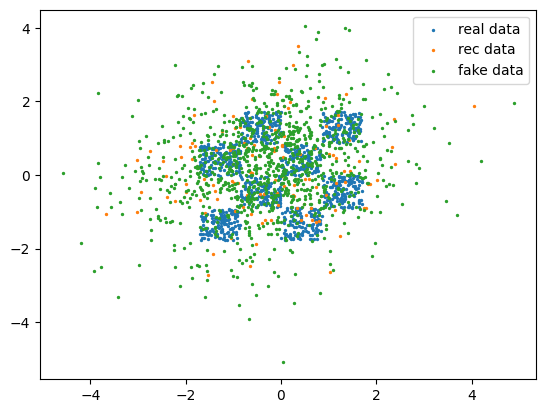

step 5000: KL: 1.554e-04, rec: 6.440e+02


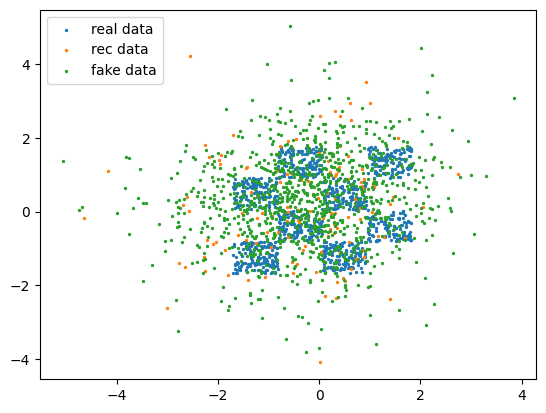

step 6000: KL: 5.386e-05, rec: 6.252e+02


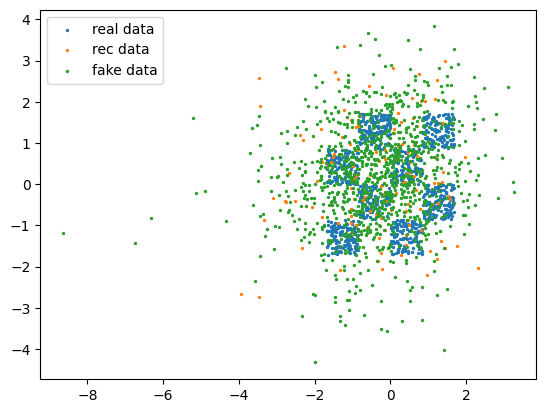

step 7000: KL: 1.035e-04, rec: 7.494e+02


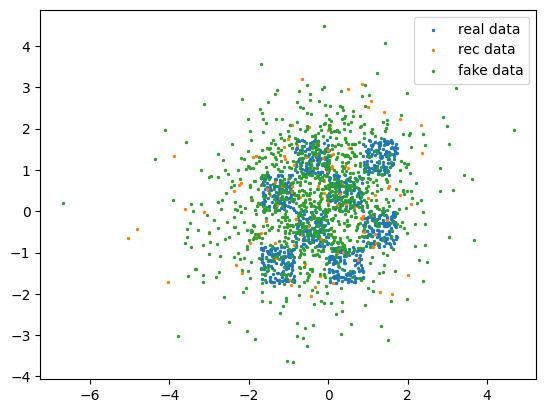

step 8000: KL: 1.246e-04, rec: 6.401e+02


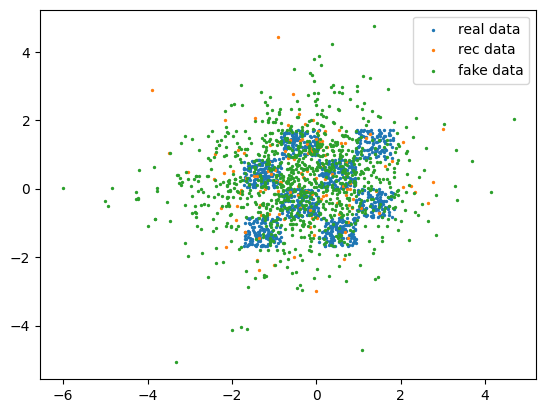

step 9000: KL: 2.260e-04, rec: 6.653e+02


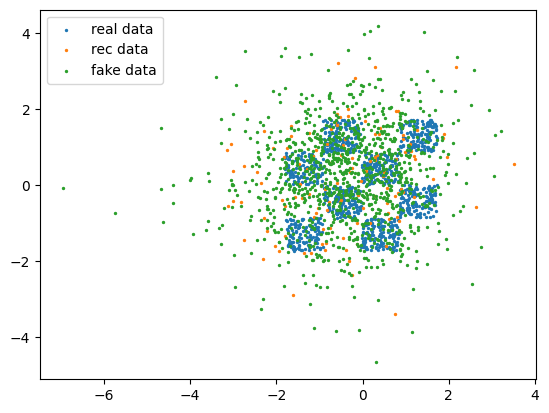

step 10000: KL: 6.717e-05, rec: 6.068e+02


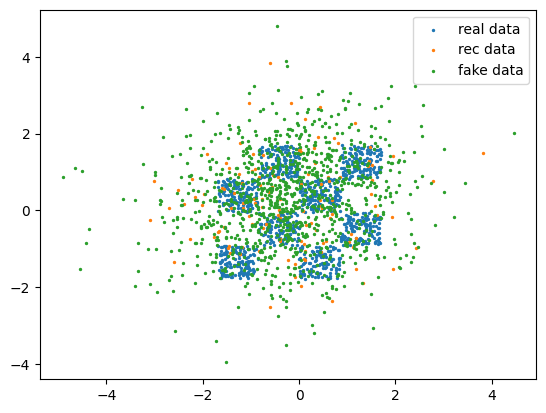

step 11000: KL: 1.703e-04, rec: 7.415e+02


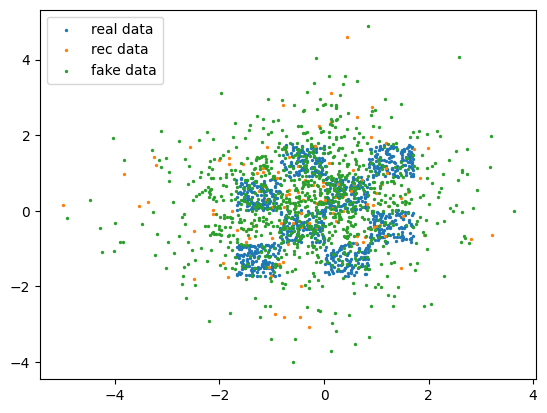

step 12000: KL: 4.821e-05, rec: 6.974e+02


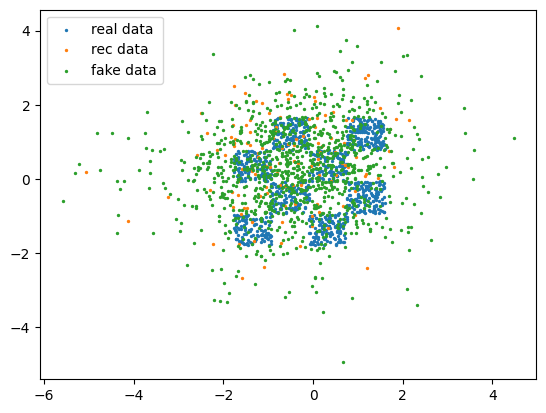

step 13000: KL: 1.610e-04, rec: 7.577e+02


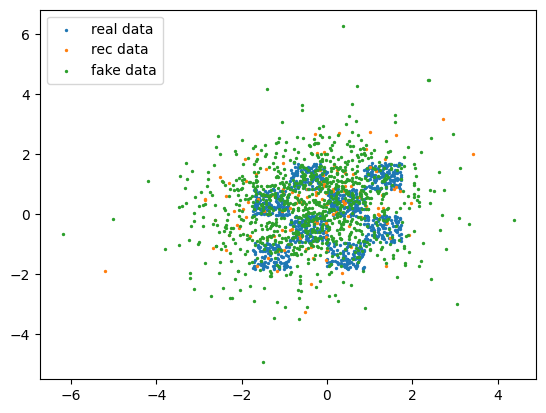

step 14000: KL: 9.575e-05, rec: 7.333e+02


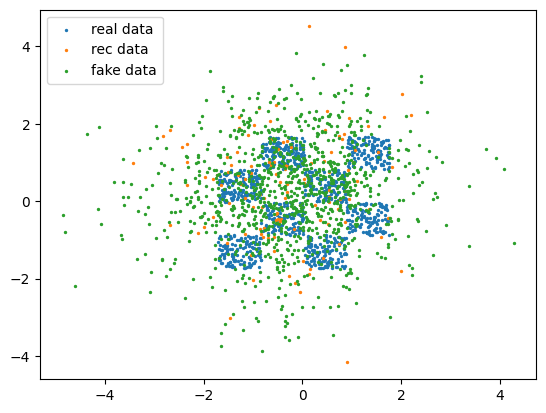

step 15000: KL: 1.372e-04, rec: 6.356e+02


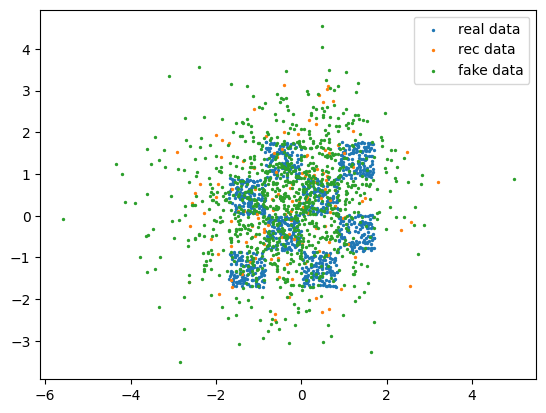

step 16000: KL: 1.211e-04, rec: 7.442e+02


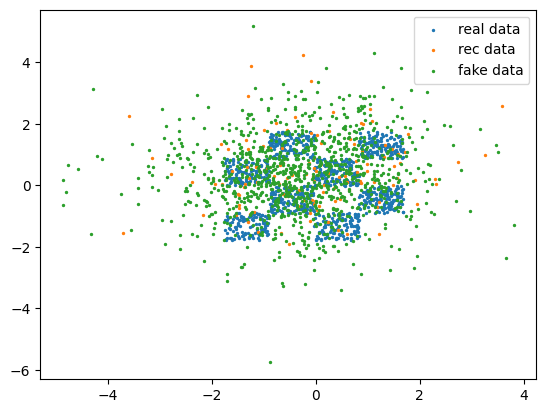

step 17000: KL: 7.940e-05, rec: 6.462e+02


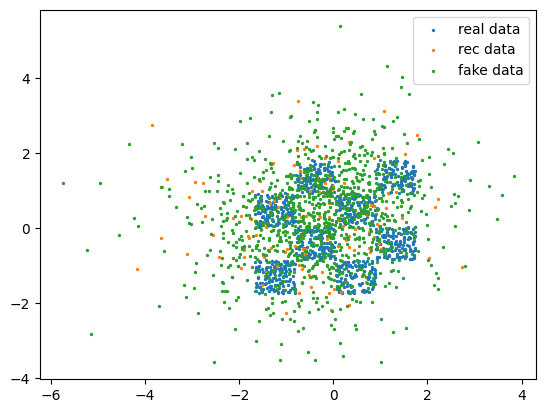

step 18000: KL: 1.642e-04, rec: 6.532e+02


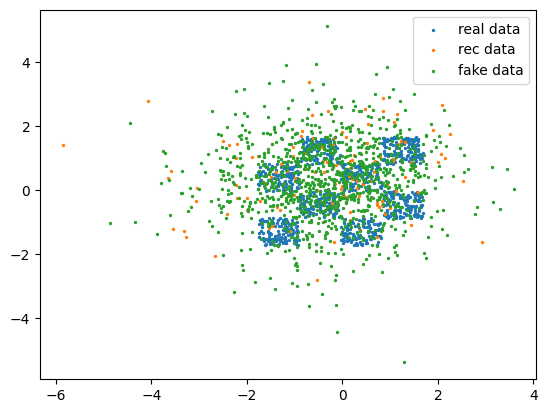

step 19000: KL: 3.305e-05, rec: 6.910e+02


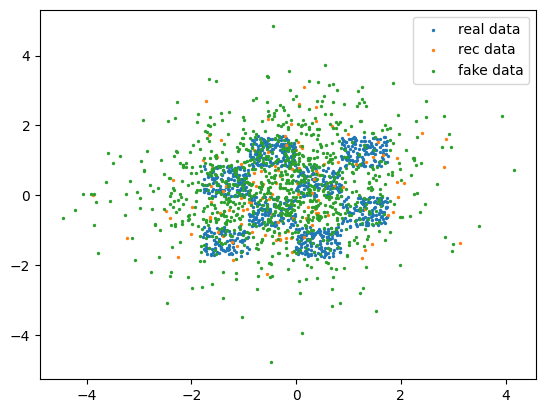

step 20000: KL: 1.919e-04, rec: 6.977e+02


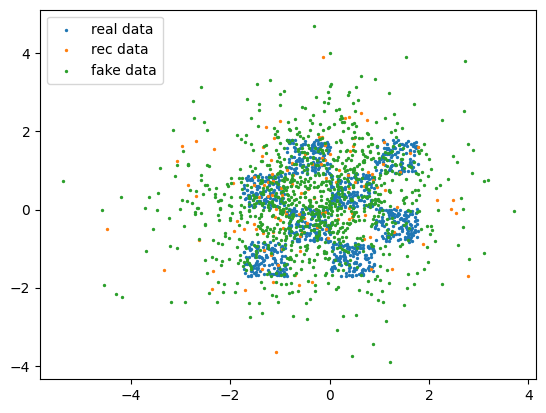

step 21000: KL: 1.409e-04, rec: 7.133e+02


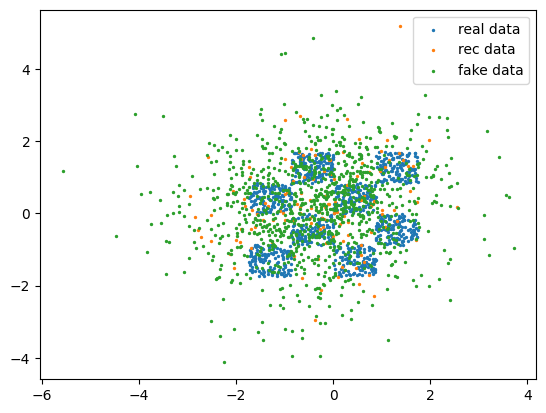

step 22000: KL: 1.126e-04, rec: 7.074e+02


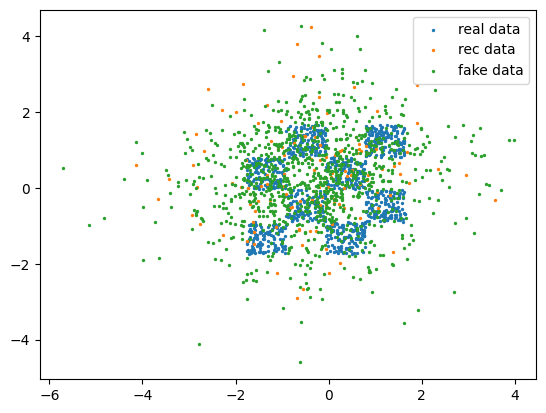

step 23000: KL: 8.824e-05, rec: 6.180e+02


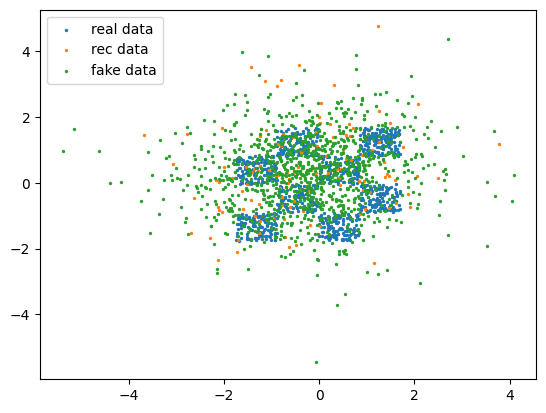

step 24000: KL: 2.751e-04, rec: 6.415e+02


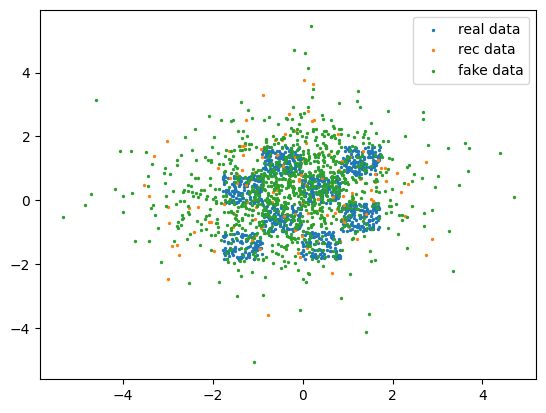

step 25000: KL: 1.502e-04, rec: 7.933e+02


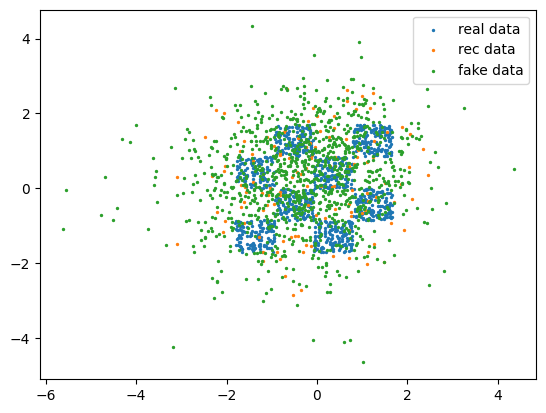

step 26000: KL: 1.431e-04, rec: 6.692e+02


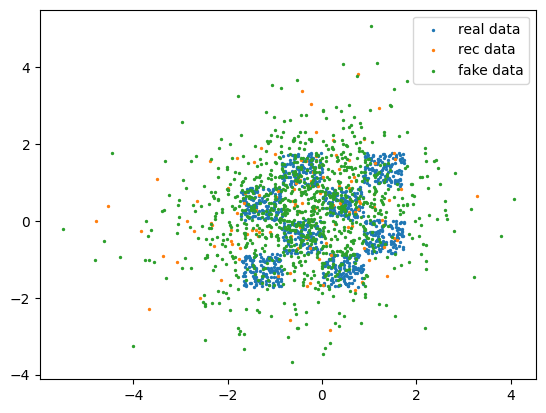

step 27000: KL: 1.085e-04, rec: 6.739e+02


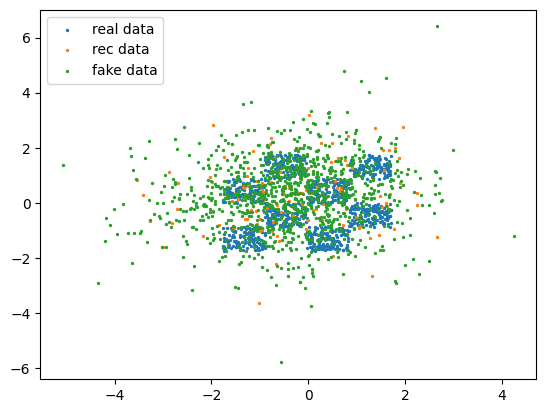

step 28000: KL: 8.928e-05, rec: 7.119e+02


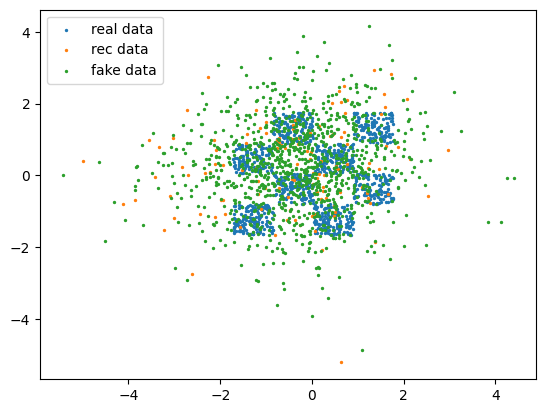

step 29000: KL: 1.754e-04, rec: 6.074e+02


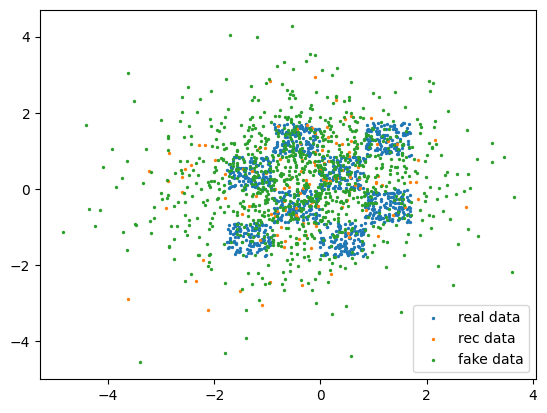

step 30000: KL: 7.161e-05, rec: 6.894e+02


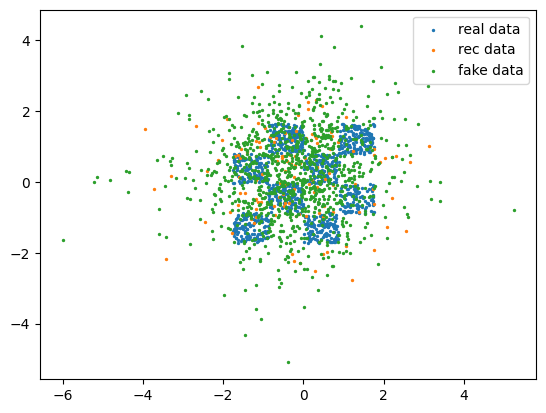

step 31000: KL: 1.120e-04, rec: 6.455e+02


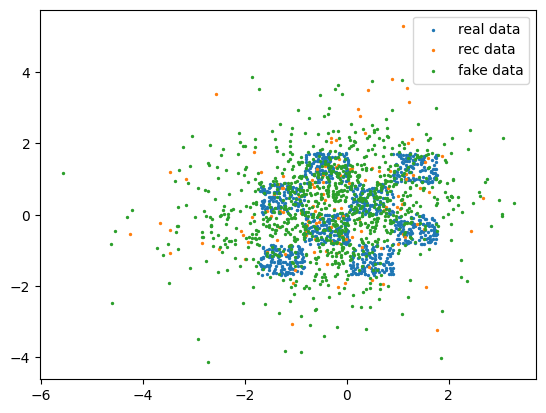

step 32000: KL: 1.589e-04, rec: 6.984e+02


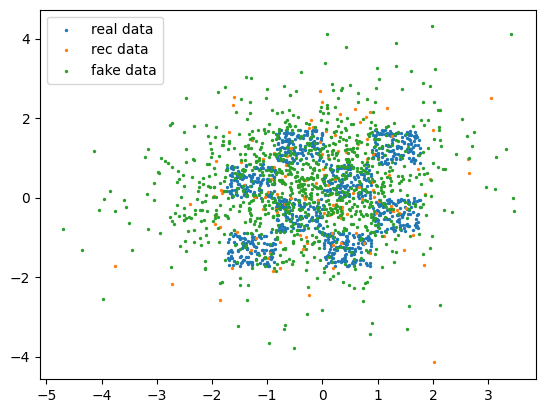

step 33000: KL: 1.562e-04, rec: 6.186e+02


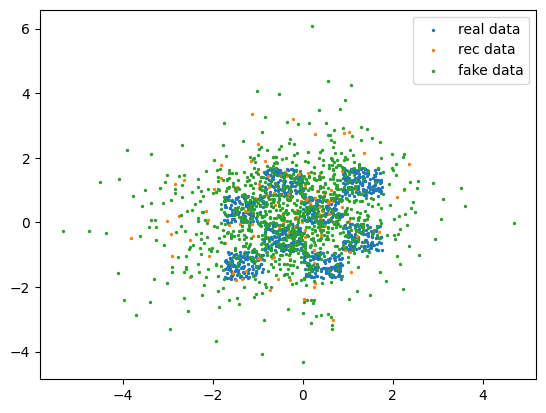

step 34000: KL: 1.550e-04, rec: 6.994e+02


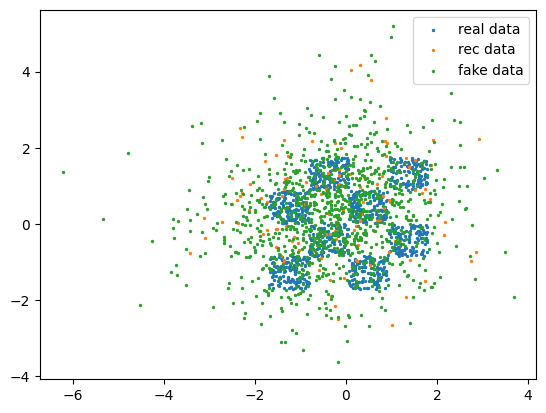

step 35000: KL: 6.947e-05, rec: 7.253e+02


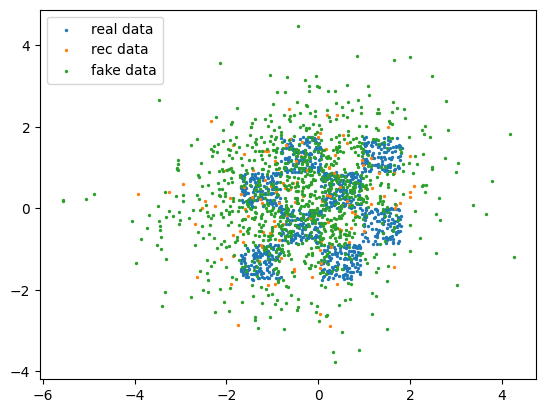

step 36000: KL: 1.094e-04, rec: 7.453e+02


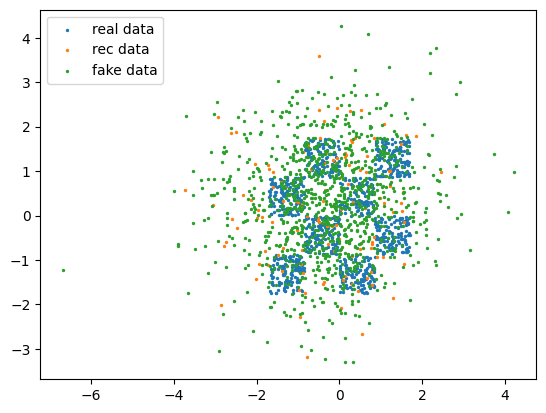

step 37000: KL: 1.450e-04, rec: 6.612e+02


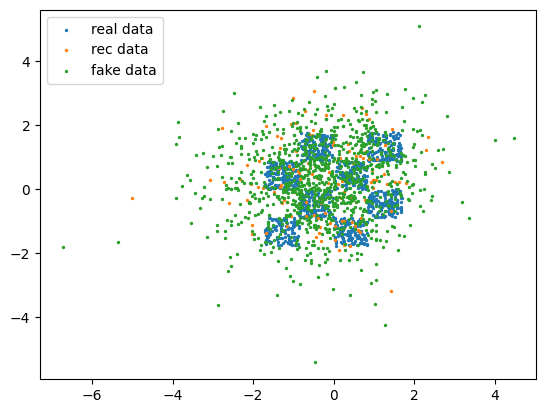

step 38000: KL: 6.608e-05, rec: 6.641e+02


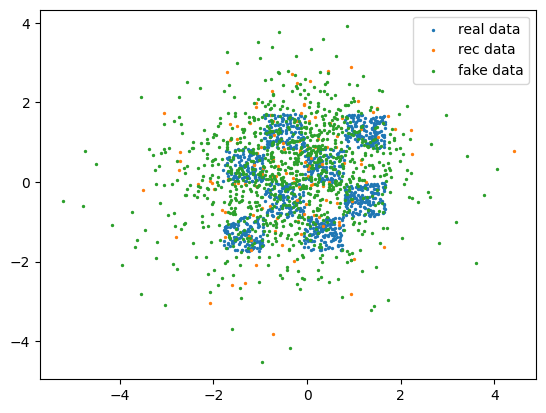

step 39000: KL: 7.375e-05, rec: 6.043e+02


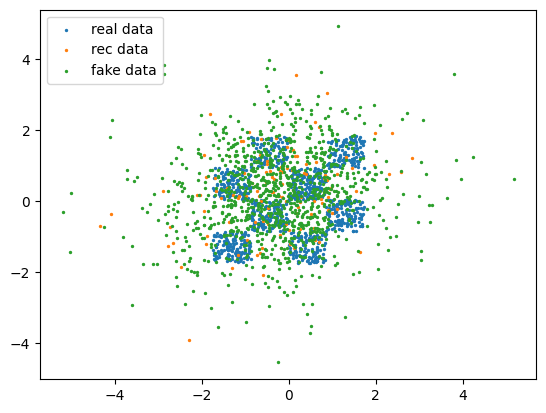

step 40000: KL: 1.074e-04, rec: 6.913e+02


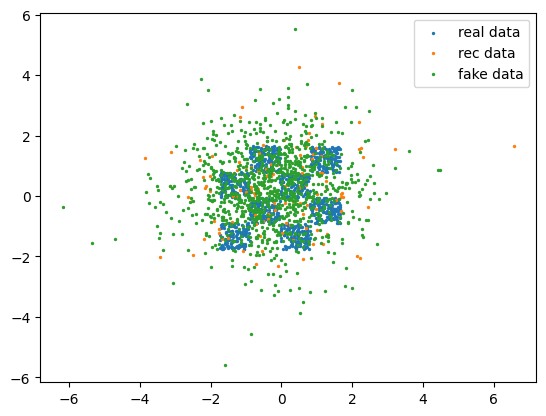

In [ ]:
# Total number of training iterations for the VAE
N_ITER = 40001
# Batch size to use
BATCHLEN = 128

encoder = Encoder()
optim_enc = torch.optim.Adam(encoder.parameters(), lr=0.001, betas=(0.5,0.9))
decoder = Decoder()
optim_dec = torch.optim.Adam(decoder.parameters(), lr=0.001, betas=(0.5,0.9))

for i in range(N_ITER):
    encoder.zero_grad()
    decoder.zero_grad()

    x = generate_batch(BATCHLEN)

    enc_mu, enc_logvar = encoder(x)
    #
    # COMPUTE THE KL PART OF THE LOSS HERE
    #
    loss_kl = 0.5 * torch.sum( enc_logvar.exp() + enc_mu.pow(2) - 1 - enc_logvar)

    #
    # SAMPLE z FROM q(z|x) HERE
    #
    std = torch.exp(0.5 * enc_logvar)
    eps = torch.randn_like(std)
    z = enc_mu + eps * std

    dec_mu, dec_logvar = decoder(z)
    #
    # COMPUTE THE RECONSTRUCTION PART OF THE LOSS HERE
    #
    recon_x = torch.normal(dec_mu, torch.exp(0.5 * dec_logvar))
    loss_rec = F.mse_loss(recon_x, x, reduction='sum')

    (loss_kl + loss_rec).backward()
    optim_enc.step()
    optim_dec.step()
    if i%1000 == 0:
        print('step {}: KL: {:.3e}, rec: {:.3e}'.format(i, float(loss_kl), float(loss_rec)))
        # plot the result
        real_batch = generate_batch(1024)
        rec_batch = torch.normal(dec_mu, torch.exp(0.5*dec_logvar)).detach()
        fake_batch = decoder.generate(1024).detach()
        plt.scatter(real_batch[:,0], real_batch[:,1], s=2.0, label='real data')
        plt.scatter(rec_batch[:,0], rec_batch[:,1], s=2.0, label='rec data')
        plt.scatter(fake_batch[:,0], fake_batch[:,1], s=2.0, label='fake data')
        plt.legend()
        plt.show()

**Q12: Try hardcoding $\sigma_\theta(z)$ to some small value (like 1E-4) rather than allowing the decoder to learn it. What does it change?**

<font color = blue> Let's first modify the decoder

In [ ]:
# Define the discriminator
class ModifiedDecoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc_mu = nn.Linear(LATENT_N, 2)
        #self.fc_logvar = nn.Linear(LATENT_N, 2)

    # decode a datapoint. This should return a couple of tensors (mu, logvar) representing
    # the parameters of the Gaussian p_\theta(z | x)
    def __call__(self, z):
        mu = self.fc_mu(z)
        #logvar = self.fc_logvar(z)
        logvar = torch.log(torch.tensor(1e-4).expand_as(mu))
        return (mu, logvar)

    def generate(self, batchlen):
        z = torch.normal(torch.zeros(batchlen, LATENT_N), 1.0)
        (mu, logvar) = self.__call__(z)
        return torch.normal(mu, torch.exp(0.5*logvar))

<font color = blue> Train the network using the modified decoder.

step 0: KL: 6.706e-05, rec: 1.508e+10


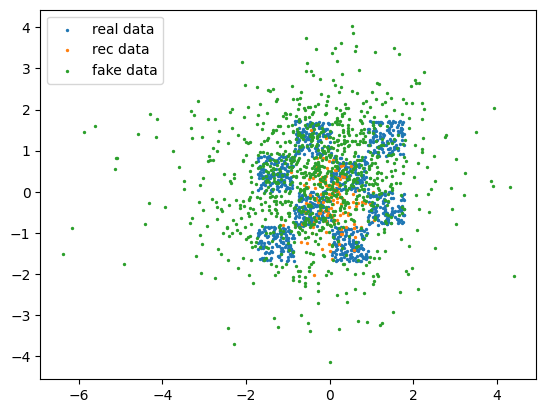

step 1000: KL: 1.415e+03, rec: 7.016e+08


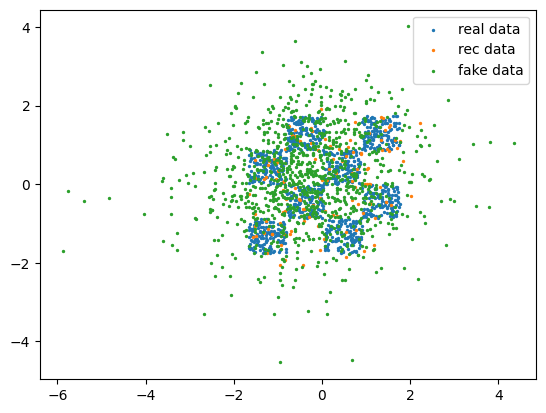

step 2000: KL: 3.838e+03, rec: 8.512e+07


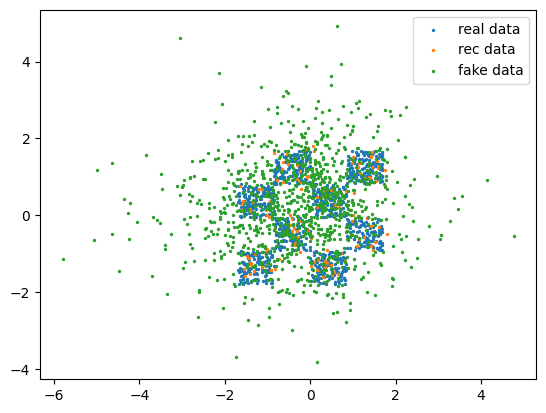

step 3000: KL: 5.619e+03, rec: 2.775e+07


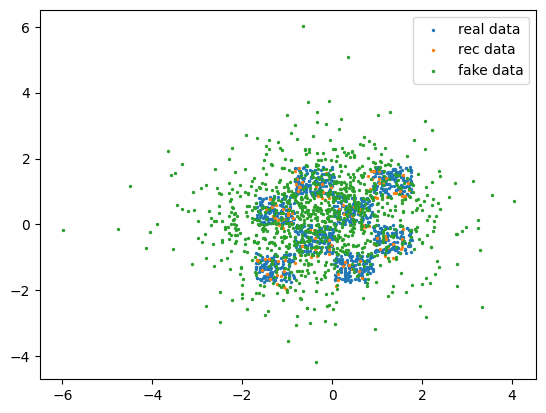

step 4000: KL: 6.549e+03, rec: 9.151e+06


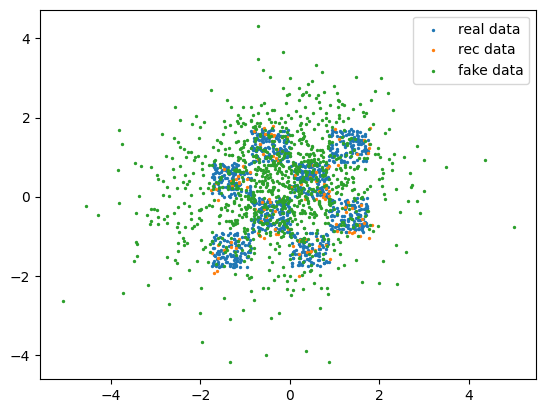

step 5000: KL: 7.711e+03, rec: 2.493e+06


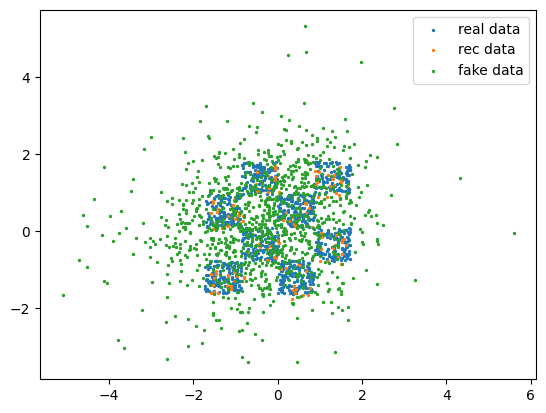

step 6000: KL: 8.460e+03, rec: 1.311e+06


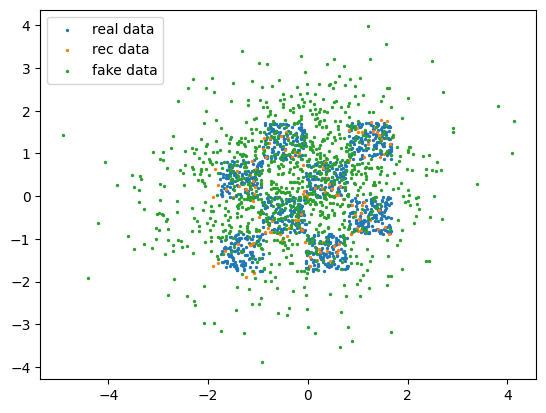

step 7000: KL: 8.933e+03, rec: 5.194e+05


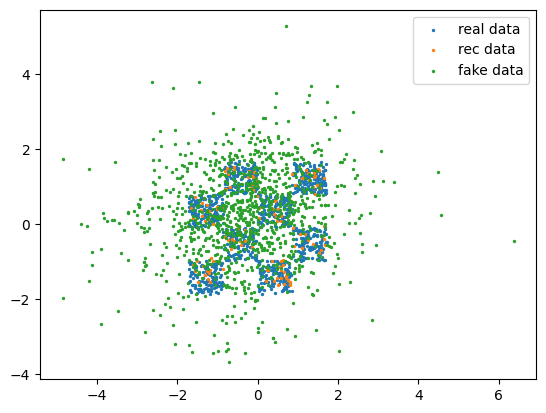

step 8000: KL: 9.623e+03, rec: 1.686e+05


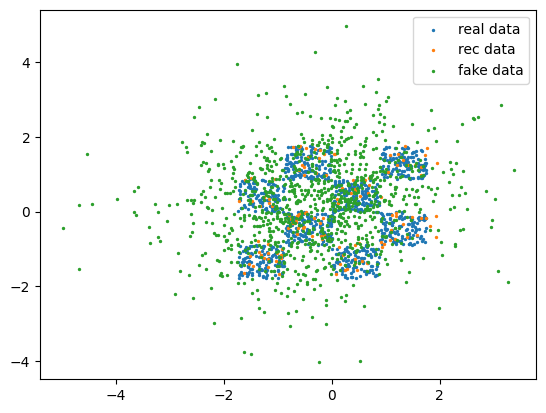

step 9000: KL: 1.028e+04, rec: 6.525e+04


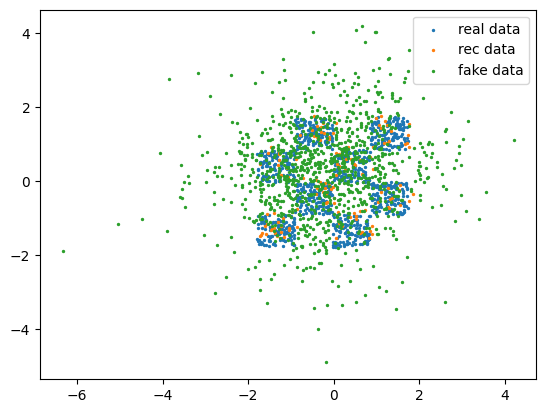

step 10000: KL: 1.076e+04, rec: 3.705e+05


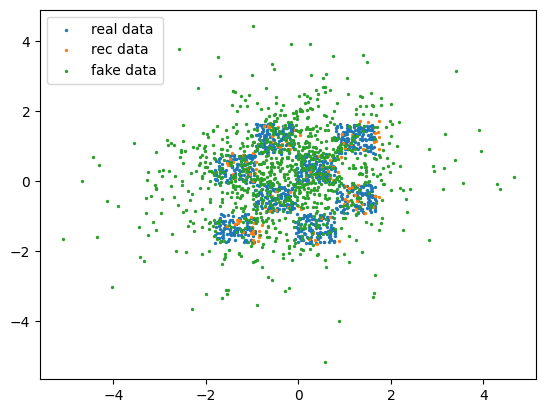

step 11000: KL: 1.111e+04, rec: 3.530e+05


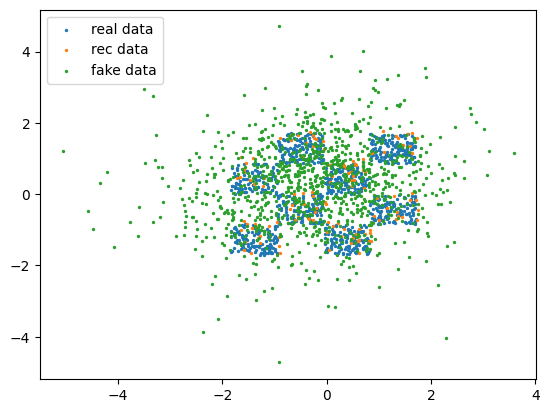

step 12000: KL: 1.135e+04, rec: 4.461e+04


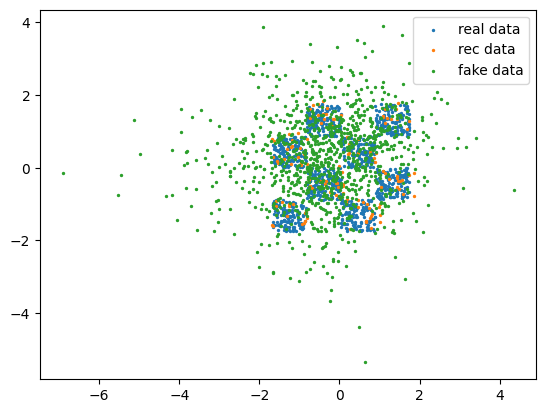

step 13000: KL: 1.176e+04, rec: 3.787e+05


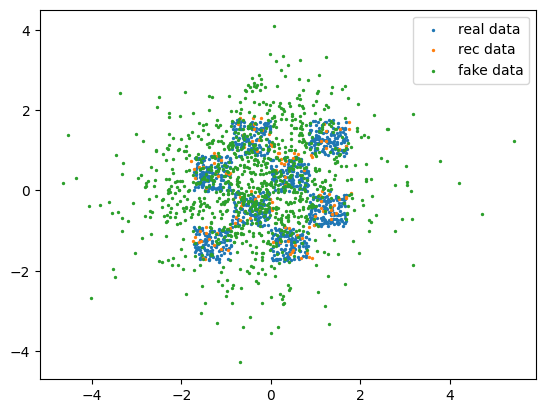

step 14000: KL: 1.202e+04, rec: 6.680e+04


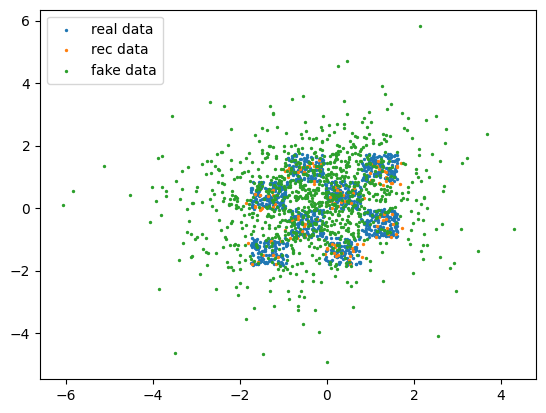

step 15000: KL: 1.223e+04, rec: 1.171e+04


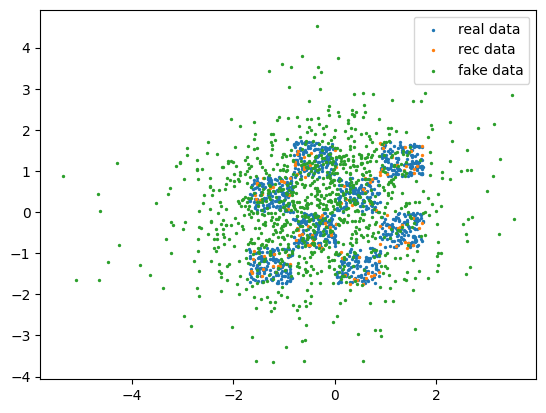

step 16000: KL: 1.262e+04, rec: 4.428e+05


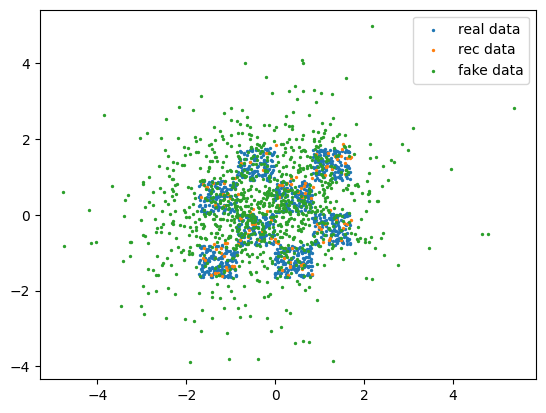

step 17000: KL: 1.235e+04, rec: 3.423e+05


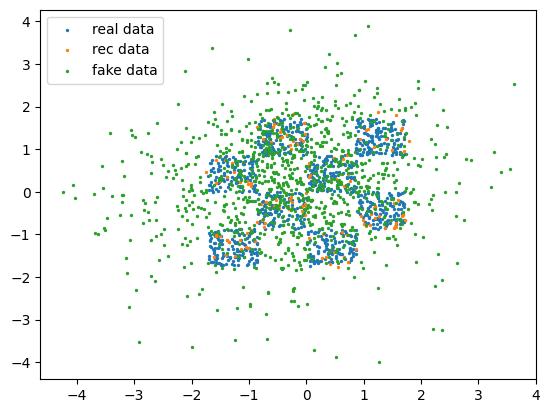

step 18000: KL: 1.235e+04, rec: 2.604e+05


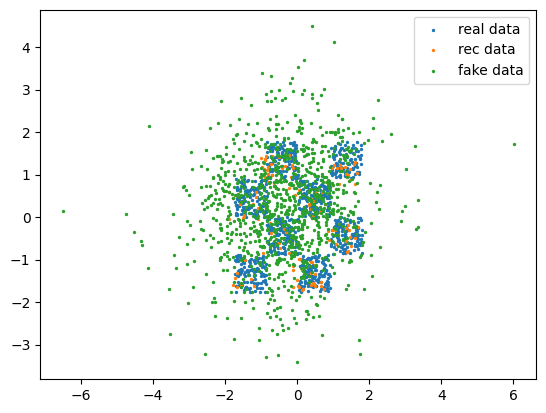

step 19000: KL: 1.263e+04, rec: 1.064e+04


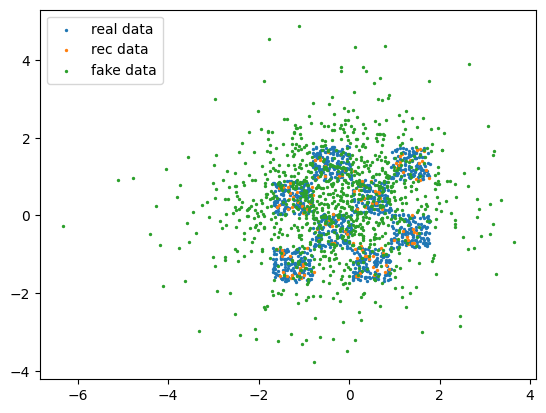

step 20000: KL: 1.259e+04, rec: 4.590e+04


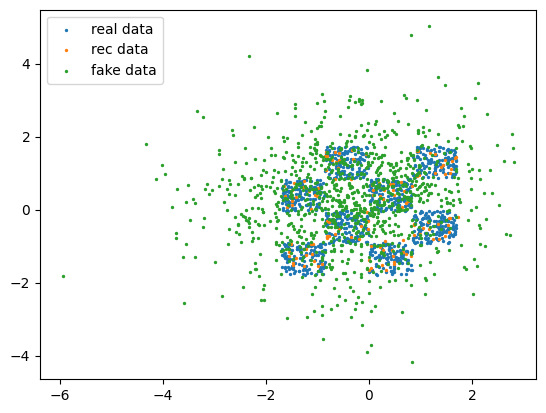

step 21000: KL: 1.243e+04, rec: 7.640e+04


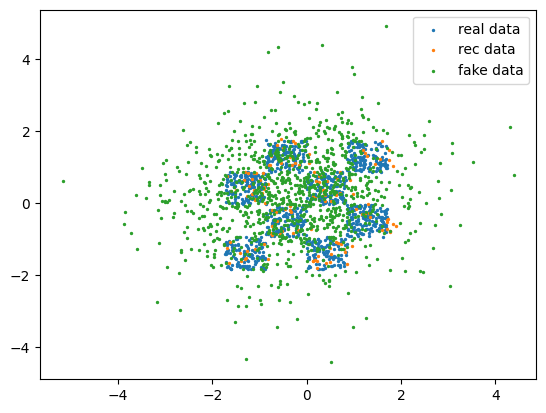

step 22000: KL: 1.267e+04, rec: 1.871e+05


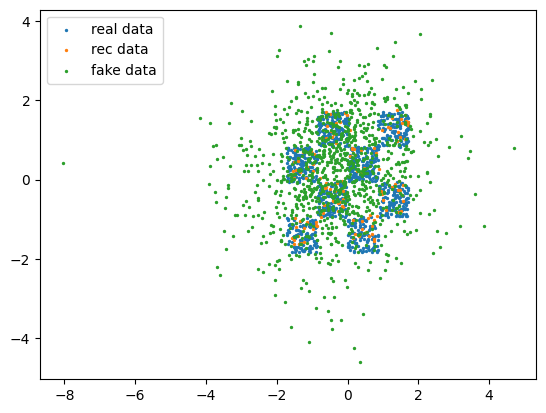

step 23000: KL: 1.275e+04, rec: 5.136e+05


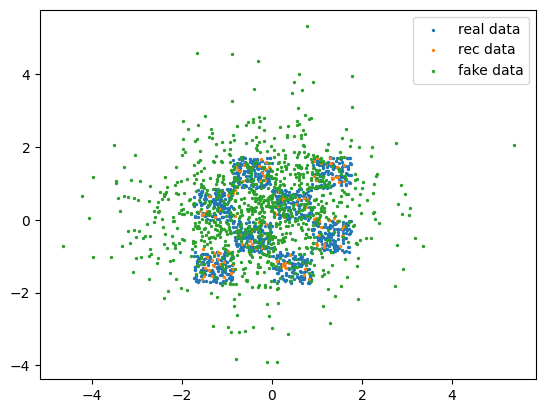

step 24000: KL: 1.269e+04, rec: 2.718e+04


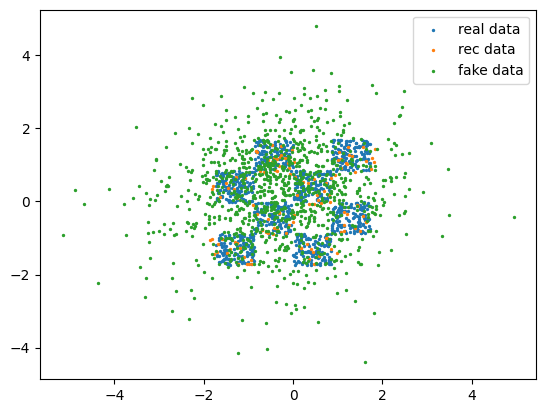

step 25000: KL: 1.257e+04, rec: 1.541e+04


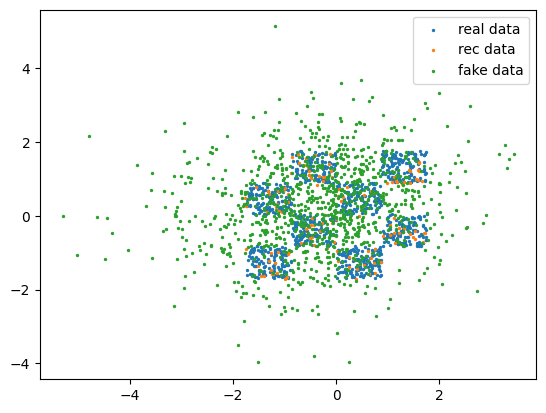

step 26000: KL: 1.262e+04, rec: 3.559e+05


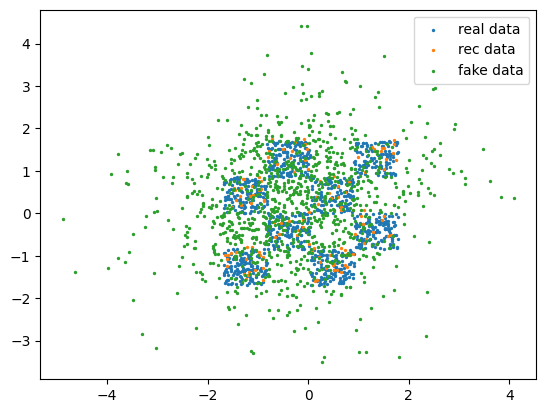

step 27000: KL: 1.249e+04, rec: 2.612e+05


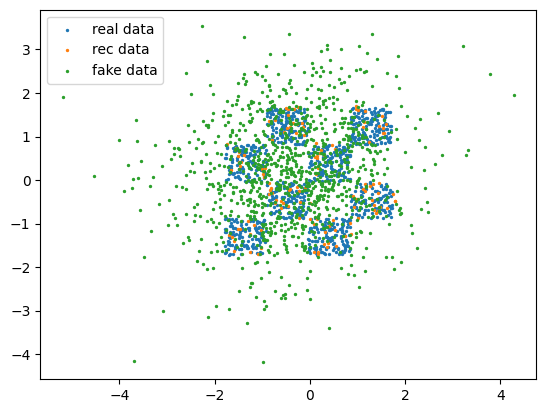

step 28000: KL: 1.254e+04, rec: 1.759e+05


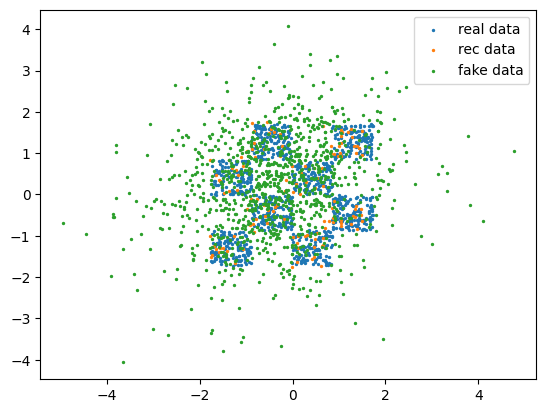

step 29000: KL: 1.264e+04, rec: 1.032e+05


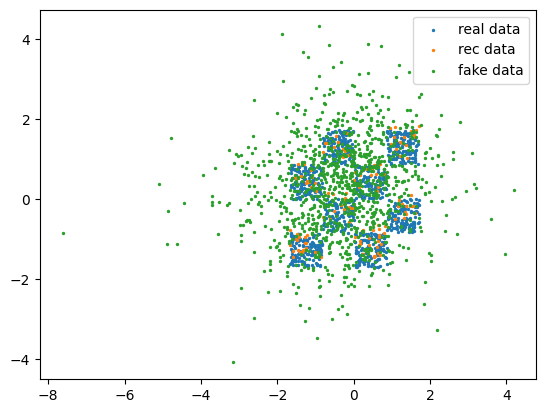

step 30000: KL: 1.238e+04, rec: 7.236e+04


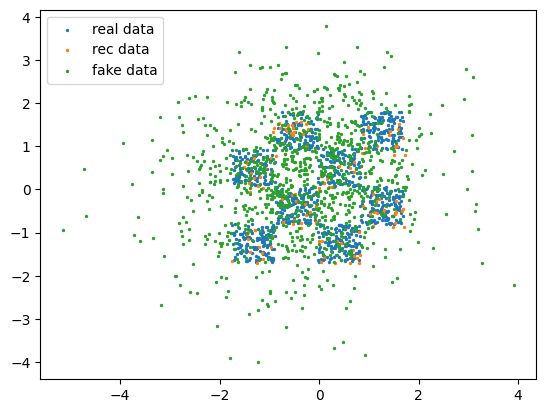

step 31000: KL: 1.264e+04, rec: 9.152e+04


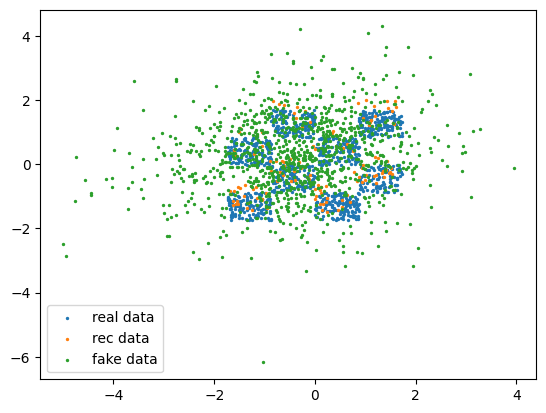

step 32000: KL: 1.239e+04, rec: 1.707e+05


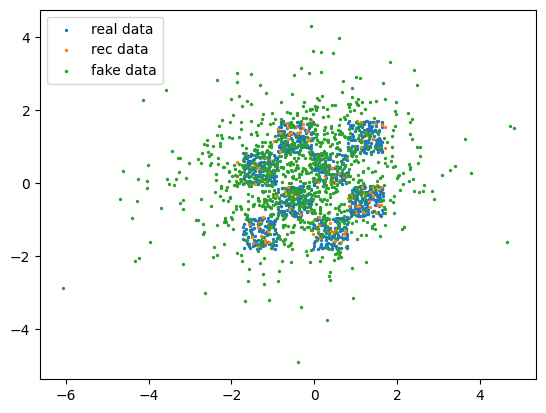

step 33000: KL: 1.251e+04, rec: 4.759e+05


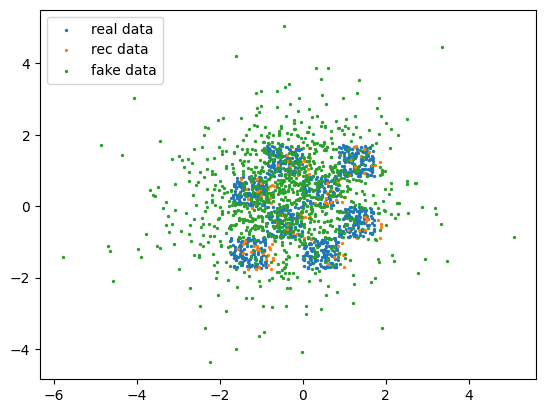

step 34000: KL: 1.235e+04, rec: 1.814e+05


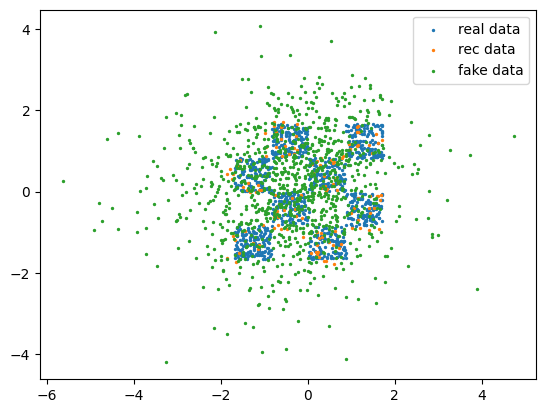

step 35000: KL: 1.251e+04, rec: 8.729e+04


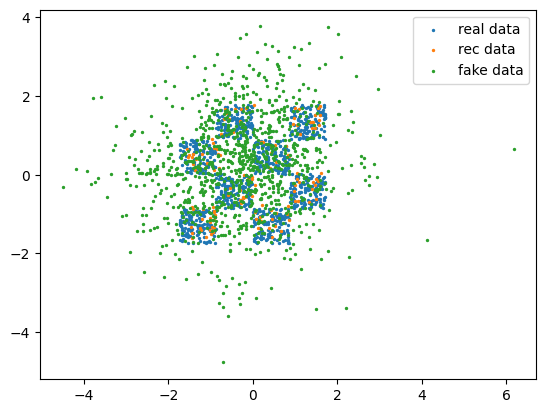

step 36000: KL: 1.239e+04, rec: 1.097e+06


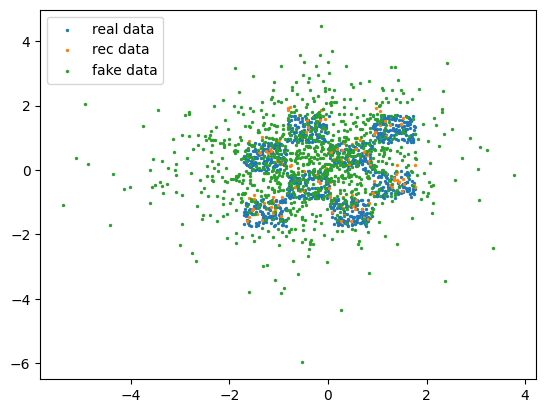

step 37000: KL: 1.240e+04, rec: 7.322e+04


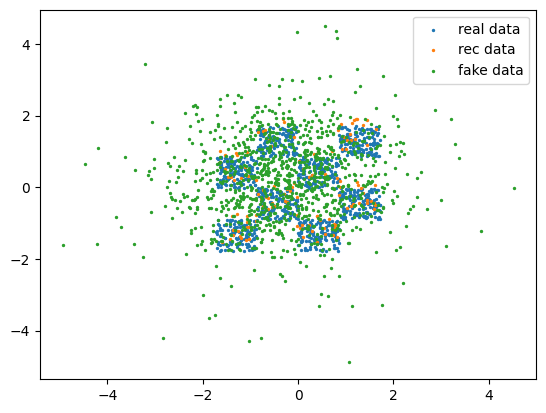

step 38000: KL: 1.234e+04, rec: 7.409e+04


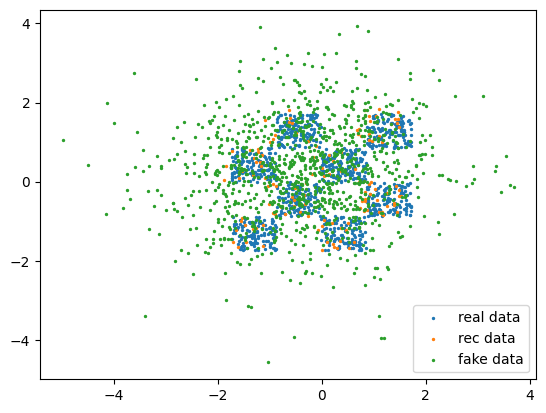

step 39000: KL: 1.236e+04, rec: 1.344e+05


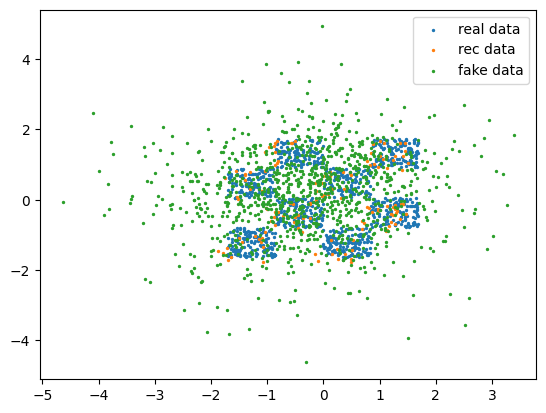

step 40000: KL: 1.236e+04, rec: 9.220e+04


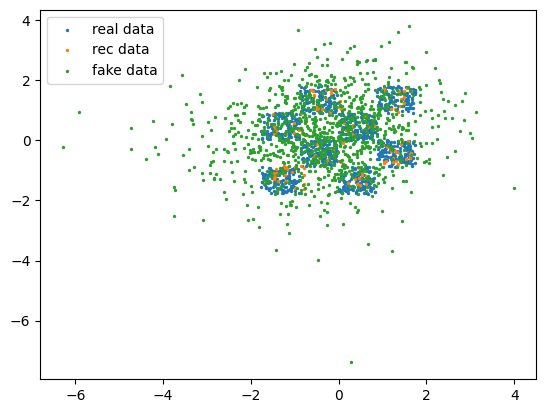

In [ ]:
modified_decoder = ModifiedDecoder()
optim_dec = torch.optim.Adam(modified_decoder.parameters(), lr=0.001, betas=(0.5,0.9))

for i in range(N_ITER):
    encoder.zero_grad()
    modified_decoder.zero_grad()

    x = generate_batch(BATCHLEN)

    enc_mu, enc_logvar = encoder(x)
    #
    # COMPUTE THE KL PART OF THE LOSS HERE
    #
    loss_kl = 0.5 * torch.sum( enc_logvar.exp() + enc_mu.pow(2) - 1 - enc_logvar)

    #
    # SAMPLE z FROM q(z|x) HERE
    #
    std = torch.exp(0.5 * enc_logvar)
    eps = torch.randn_like(std)
    z = enc_mu + eps * std

    dec_mu, _ = modified_decoder(z)
    hardcoded_sigma = torch.tensor(1e-4)
    #
    # COMPUTE THE RECONSTRUCTION PART OF THE LOSS HERE
    #
    loss_rec = F.mse_loss(dec_mu, x, reduction='sum') / (2 * hardcoded_sigma**2)

    (loss_kl + loss_rec).backward()
    optim_enc.step()
    optim_dec.step()
    if i%1000 == 0:
        print('step {}: KL: {:.3e}, rec: {:.3e}'.format(i, float(loss_kl), float(loss_rec)))
        # plot the result
        real_batch = generate_batch(1024)
        rec_batch = torch.normal(dec_mu, hardcoded_sigma).detach()
        fake_batch = decoder.generate(1024).detach()
        plt.scatter(real_batch[:,0], real_batch[:,1], s=2.0, label='real data')
        plt.scatter(rec_batch[:,0], rec_batch[:,1], s=2.0, label='rec data')
        plt.scatter(fake_batch[:,0], fake_batch[:,1], s=2.0, label='fake data')
        plt.legend()
        plt.show()

<font color = blue> After setting $\sigma$ to a very small value in the decoder of the VAE, now it is evident from the plots that the reconstructed data (orange points) is similar to the real data (blue points). This is because a small $\sigma$ forces the model to minimize the distance between the original and reconstructed data, so the VAE is acting as a traditional autoencoder.

<font color = blue> This can be beneficial for some specific tasks, such as when the latent space of the autoencoder is used for dimensionality reduction. However, this sacrifices the main feature that distinguishes VAEs from other autoencoders, the capacity to generate new and diverse data. When $\sigma$ is learned, the model can maintain a balance between accurate reconstruction and capturing the structure of the data. This way, the model is able to generate new data in the latent space (since it understands the underlying distribution of the data) and reconstructs it in a way that it looks similar to real data.

**Q13: How do the power of encoder and decoder affect the overall training of the VAE?**

<font color = blue> The most important thing to have into consideration for the power of encoder and decoder for the training of a VAE is to find the right balance.

<font color = blue> If the encoder is too strong, it might create a too complex latent space that the decoder will not be able to handle (interfering with the learning). On the other hand, if the decoder is too strong, it will become too specialized on the specific data of the training set and won't learn the general patterns, leading to overfitting.

<font color = blue> At the same time, a too weak encoder will not be able to generate the latent variables' distribution from the input, and a too weak decoder will not know how to rebuild the input from latent representations.

<font color = blue> For this reason, the power of the encoder and the decoder must be balanced for a correct VAE training.

---
### Conclusion

**Q.28: As a conclusion, how would you compare the advantages and shortcomings of GANs, VAEs, Normalizing flows and Denoising Models ?**

<font color = blue> Generally, the key considerations when choosing a generative model are sample quality, training stability, interpretability and model size.

<font color = blue> GANs are able to create high-fidelity samples, especially for images, but the training can suffer from instability due to mode collapse and vanishing gradients (concepts we already discussed in previous questions).

<font color = blue> VAEs are very easy to train and their latent space is easily accessed and can be useful to manipulate data or use it in other tasks. On the other hand, their generated samples tend to be blurry and have a lower quality compared to other models like GANs or denoising models.

<font color = blue> Normalized flows provide good quality samples and interpretability since they are able to directly model the data distribution. The shortcoming of this type of models is that the training can be computationally expensive.

<font color = blue> Finally, denoising models have the hability to generate highly realistic samples, and although they are usually computationally expensive, their hability to perform parallel training can reduce this shortcoming. The main challenge they pose is that controlling the specific characteristics of the generated data is not easy.